# This notebook is created for the analysis of Customer 3 on WD Brand and the Competitor's SPC Brand

### BUSINESS PROBLEM: 
The company is one of the leading household cleaning supplies brand in US and
sells products under the ‘WD Brand’. Another competitor in the same line of business is ‘SPC Brand’.
The company has 3 major customers – Customer 1, Customer 2 and Customer 3 and the business
requirement is to identify the pricing dynamics for ‘WD’ Brand of products.

Problem statement: 

To identify the pricing dynamics for a leading household cleaning supplies brand.
• What is Brand’s total U.S. price elasticity?

• Create a robust imputation logic where price data is missing.

• Is the price elasticity increasing or decreasing over time?

• Which customer segment are most price elastic?

• What is the impact of key competitor’s pricing on the target brand?

• Create price elasticity curves by key customer segments / time periods? (Elasticity may
differ at different price points and we would like to change in elasticity.)

In [275]:
#Importing all the libraries for Data Manipulation and Visualization

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [276]:
#Importing the libraries for Linear Regression modelling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
from sklearn.preprocessing import PowerTransformer
boxtrans = PowerTransformer(method='box-cox')
from sklearn.preprocessing import RobustScaler
robustscale=RobustScaler()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [277]:
#Importing the dataset into dataframe
cust3=pd.read_excel("C:\\Users\\IPBAM013\\Documents\\Ankit\\Project_Dataset.xlsx",sheet_name="Customer3")

In [278]:
# Creating a copy
cust3ini=cust3.copy()

### (i) Checking the raw data

In [279]:
cust3.head()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
0,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,490200HO,811.0,WD009,13.0,102.2801
1,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,300012,835.0,SPC11,1.0,5.9700
2,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,300240,835.0,SPC10,1.0,5.7900
3,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,490054,811.0,WD012,17.0,72.3707
4,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,490252,811.0,WD012,1.0,9.8800


In [280]:
cust3.tail()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
768290,2016-06-18 00:00:00,34460,989.0,NJ,8002.0,300004,835.0,SPC11,5.0,29.26
768291,2016-06-18 00:00:00,34460,989.0,NJ,8002.0,300059,835.0,SPC10,3.0,20.91
768292,2016-06-18 00:00:00,34460,989.0,NJ,8002.0,300012,835.0,SPC11,8.0,47.76
768293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768294,(768293 ro,w(s) affected),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
#Number of rows and columns
cust3.shape

(768295, 10)

In [282]:
#Additional info about dataframe
cust3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768295 entries, 0 to 768294
Data columns (total 10 columns):
EndDate           768294 non-null object
CustomerNumber    768294 non-null object
StoreNumber       768293 non-null float64
StateTerritory    699868 non-null object
PostalCode        699868 non-null float64
PartNumber        699868 non-null object
ProdRptCat        699868 non-null float64
PRODSTYLE         699868 non-null object
UnitsSold         699868 non-null float64
AmtSold           699868 non-null float64
dtypes: float64(5), object(5)
memory usage: 58.6+ MB


In [283]:
#Get Statistical description for the Numeric columns
cust3.describe()

,StoreNumber,PostalCode,ProdRptCat,UnitsSold,AmtSold
count,768293.000000,699868.000000,699868.000000,699868.000000,699868.000000
mean,3362.553808,52375.915913,824.153945,7.983980,40.453897
std,2489.729382,30803.550114,13.575995,12.625186,56.355077
min,105.000000,659.000000,811.000000,-120.000000,-596.400000
25%,1072.000000,28213.000000,811.000000,1.000000,7.940000
50%,2771.000000,49080.000000,835.000000,4.000000,20.240100
75%,6153.000000,80465.000000,835.000000,10.000000,49.700000
max,8998.000000,99801.000000,850.000000,2740.000000,10064.842000


In [284]:
#Get the datatypes for each column
cust3.dtypes

EndDate            object
CustomerNumber     object
StoreNumber       float64
StateTerritory     object
PostalCode        float64
PartNumber         object
ProdRptCat        float64
PRODSTYLE          object
UnitsSold         float64
AmtSold           float64
dtype: object

## (ii) Data Cleaning and Preparation

In [285]:
#Verifying the null rows
cust3['UnitsSold'].isnull().sum()

68427

In [286]:
#Dropping the null values
cust3.dropna(inplace=True)

In [287]:
cust3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699868 entries, 0 to 768292
Data columns (total 10 columns):
EndDate           699868 non-null object
CustomerNumber    699868 non-null object
StoreNumber       699868 non-null float64
StateTerritory    699868 non-null object
PostalCode        699868 non-null float64
PartNumber        699868 non-null object
ProdRptCat        699868 non-null float64
PRODSTYLE         699868 non-null object
UnitsSold         699868 non-null float64
AmtSold           699868 non-null float64
dtypes: float64(5), object(5)
memory usage: 58.7+ MB


### Now we have removed all the null values. Let's check for the negative values in the data

In [288]:
# Get the negative and zero values for UnitsSold
cust3[(cust3['UnitsSold']<0) | (cust3['AmtSold']<=0)]

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold
28,2015-03-01 00:00:00,34460,1006.0,CA,95336.0,300042,835.0,SP001,-3.0,-83.91
34,2015-03-01 00:00:00,34460,1006.0,CA,95336.0,10425,811.0,WD012,-12.0,-57.36
158,2015-03-01 00:00:00,34460,1040.0,CA,93036.0,490269HO,811.0,WD012,-2.0,-15.96
308,2015-03-01 00:00:00,34460,1077.0,CA,92677.0,490054,811.0,WD012,-1.0,-3.97
859,2015-03-01 00:00:00,34460,1258.0,NY,11772.0,300240,835.0,SPC10,-2.0,-11.94
...,...,...,...,...,...,...,...,...,...,...
767496,2016-06-18 00:00:00,34460,8465.0,NY,11590.0,300240,835.0,SPC10,-1.0,-5.97
767722,2016-06-18 00:00:00,34460,865.0,AL,36609.0,300059,835.0,SPC10,-1.0,-6.97
768014,2016-06-18 00:00:00,34460,918.0,NJ,8850.0,490293HO,811.0,WD012,-1.0,-6.88
768212,2016-06-18 00:00:00,34460,962.0,NJ,8807.0,300012,835.0,SPC11,-2.0,-11.94


In [289]:
#Removing the above 3742 rows 
cust3.drop(cust3[(cust3['UnitsSold']<0) | (cust3['AmtSold']<=0)].index,inplace=True)


In [290]:
#Verify the above operation 
cust3[(cust3['UnitsSold']<0) | (cust3['AmtSold']<=0)]

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold


In [291]:
cust3.describe()    #Remove this

,StoreNumber,PostalCode,ProdRptCat,UnitsSold,AmtSold
count,696126.000000,696126.000000,696126.000000,696126.000000,696126.000000
mean,3313.421263,52356.822620,824.135756,8.031172,40.707943
std,2472.088053,30790.645613,13.564845,12.640490,56.385650
min,105.000000,659.000000,811.000000,1.000000,0.010000
25%,1040.000000,28213.000000,811.000000,2.000000,7.980000
50%,2759.000000,49036.000000,835.000000,4.000000,20.640000
75%,6001.000000,80401.000000,835.000000,10.000000,49.700000
max,8998.000000,99801.000000,850.000000,2740.000000,10064.842000


#### So now we have removed all the missing values, negative and zero values of amount sold, negative values of units sold

## (iii) Creating new Column for Unit Price 

In [292]:
cust3['UnitPrice']=cust3['AmtSold']/cust3['UnitsSold']

In [293]:
cust3.head()

,EndDate,CustomerNumber,StoreNumber,StateTerritory,PostalCode,PartNumber,ProdRptCat,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,490200HO,811.0,WD009,13.0,102.2801,7.8677
1,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,300012,835.0,SPC11,1.0,5.9700,5.9700
2,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,300240,835.0,SPC10,1.0,5.7900,5.7900
3,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,490054,811.0,WD012,17.0,72.3707,4.2571
4,2015-03-01 00:00:00,34460,1001.0,CA,95380.0,490252,811.0,WD012,1.0,9.8800,9.8800


In [294]:
#Changing the data type of End Date to date time
cust3['EndDate']=pd.to_datetime(cust3['EndDate'])

In [295]:
cust3.dtypes

EndDate           datetime64[ns]
CustomerNumber            object
StoreNumber              float64
StateTerritory            object
PostalCode               float64
PartNumber                object
ProdRptCat               float64
PRODSTYLE                 object
UnitsSold                float64
AmtSold                  float64
UnitPrice                float64
dtype: object

In [296]:
totalRevenue=cust3['AmtSold'].sum()

In [297]:
#Separating the Brand Data
cust3.drop(['PostalCode','ProdRptCat','StoreNumber','CustomerNumber','StateTerritory','PartNumber'],axis=1, inplace=True)
cust3_WD=cust3[cust3['PRODSTYLE'].str.match('WD')]
cust3_SPC=cust3[cust3['PRODSTYLE'].str.match('SPC')]
cust3_SP=cust3[cust3['PRODSTYLE'].str.match('SP0')]

In [298]:
cust3_WD.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
0,2015-03-01,WD009,13.0,102.2801,7.8677
3,2015-03-01,WD012,17.0,72.3707,4.2571
4,2015-03-01,WD012,1.0,9.8800,9.8800
5,2015-03-01,WD008,1.0,3.5700,3.5700
7,2015-03-01,WD008,11.0,41.4799,3.7709


In [299]:
cust3_SPC.head()

,EndDate,PRODSTYLE,UnitsSold,AmtSold,UnitPrice
1,2015-03-01,SPC11,1.0,5.97,5.97
2,2015-03-01,SPC10,1.0,5.79,5.79
6,2015-03-01,SPC11,1.0,5.97,5.97
12,2015-03-01,SPC10,6.0,35.82,5.97
13,2015-03-01,SPC11,3.0,17.91,5.97


In [300]:
cust3_SP.describe()    
# This brand comprises of only 1.64% of total data. Moreover, this is out of scope for our analysis as per problem statement

,UnitsSold,AmtSold,UnitPrice
count,11453.000000,11453.000000,11453.000000
mean,1.599581,16.916291,12.449089
std,1.221878,16.314573,10.460027
min,1.000000,0.020000,0.010000
25%,1.000000,5.970000,5.970000
50%,1.000000,11.940000,5.970000
75%,2.000000,27.970000,27.970000
max,18.000000,223.760000,27.970000


In [301]:
#Get the unique Subproducts of WD
cust3_WD['PRODSTYLE'].unique()

array(['WD009', 'WD012', 'WD008', 'WD017'], dtype=object)

In [302]:
#Get the unique Subproducts of SPC
cust3_SPC['PRODSTYLE'].unique()

array(['SPC11', 'SPC10', 'SPC15'], dtype=object)

### Creating Subproducts Dataframes

In [303]:
cust3_WD009=cust3_WD[cust3_WD['PRODSTYLE']=='WD009']
cust3_WD009.columns=['EndDate','WD009','WD009UnitsSold','WD009AmtSold','WD009UnitPrice']
cust3_WD009.head()

,EndDate,WD009,WD009UnitsSold,WD009AmtSold,WD009UnitPrice
0,2015-03-01,WD009,13.0,102.2801,7.8677
11,2015-03-01,WD009,34.0,267.1312,7.8568
20,2015-03-01,WD009,15.0,116.1795,7.7453
23,2015-03-01,WD009,36.0,278.9784,7.7494
31,2015-03-01,WD009,4.0,31.3000,7.8250


In [304]:
cust3_WD009.drop(['WD009'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [305]:
cust3_WD012=cust3_WD[cust3_WD['PRODSTYLE']=='WD012']
cust3_WD012.columns=['EndDate','WD012','WD012UnitsSold','WD012AmtSold','WD012UnitPrice']
cust3_WD012.head()

,EndDate,WD012,WD012UnitsSold,WD012AmtSold,WD012UnitPrice
3,2015-03-01,WD012,17.0,72.3707,4.2571
4,2015-03-01,WD012,1.0,9.8800,9.8800
8,2015-03-01,WD012,10.0,79.1600,7.9160
10,2015-03-01,WD012,93.0,377.5614,4.0598
15,2015-03-01,WD012,3.0,29.6400,9.8800


In [306]:
cust3_WD012.drop(['WD012'],axis=1,inplace=True)

In [307]:
cust3_WD008=cust3_WD[cust3_WD['PRODSTYLE']=='WD008']
cust3_WD008.columns=['EndDate','WD008','WD008UnitsSold','WD008AmtSold','WD008UnitPrice']
cust3_WD008.head()

,EndDate,WD008,WD008UnitsSold,WD008AmtSold,WD008UnitPrice
5,2015-03-01,WD008,1.0,3.5700,3.5700
7,2015-03-01,WD008,11.0,41.4799,3.7709
9,2015-03-01,WD008,58.0,222.2618,3.8321
17,2015-03-01,WD008,7.0,27.6703,3.9529
18,2015-03-01,WD008,2.0,7.3400,3.6700


In [308]:
cust3_WD008.drop(['WD008'],axis=1,inplace=True)

In [309]:
cust3_WD017=cust3_WD[cust3_WD['PRODSTYLE']=='WD017']
cust3_WD017.columns=['EndDate','WD017','WD017UnitsSold','WD017AmtSold','WD017UnitPrice']
cust3_WD017.head()

,EndDate,WD017,WD017UnitsSold,WD017AmtSold,WD017UnitPrice
239272,2015-07-18,WD017,1.0,7.88,7.88
239425,2015-07-18,WD017,1.0,7.88,7.88
239451,2015-07-18,WD017,6.0,47.28,7.88
239513,2015-07-18,WD017,4.0,31.52,7.88
240328,2015-07-18,WD017,5.0,39.40,7.88


In [310]:
cust3_WD017.drop(['WD017'],axis=1,inplace=True)

In [311]:
cust3_SPC11=cust3_SPC[cust3_SPC['PRODSTYLE']=='SPC11']
cust3_SPC11.columns=['EndDate','SPC11','SPC11UnitsSold','SPC11AmtSold','SPC11UnitPrice']
cust3_SPC11.head()

,EndDate,SPC11,SPC11UnitsSold,SPC11AmtSold,SPC11UnitPrice
1,2015-03-01,SPC11,1.0,5.97,5.97
6,2015-03-01,SPC11,1.0,5.97,5.97
13,2015-03-01,SPC11,3.0,17.91,5.97
14,2015-03-01,SPC11,1.0,5.97,5.97
21,2015-03-01,SPC11,2.0,11.94,5.97


In [312]:
cust3_SPC11.drop(['SPC11'],axis=1,inplace=True)

In [313]:
cust3_SPC10=cust3_SPC[cust3_SPC['PRODSTYLE']=='SPC10']
cust3_SPC10.columns=['EndDate','SPC10','SPC10UnitsSold','SPC10AmtSold','SPC10UnitPrice']
cust3_SPC10.head()

,EndDate,SPC10,SPC10UnitsSold,SPC10AmtSold,SPC10UnitPrice
2,2015-03-01,SPC10,1.0,5.79,5.79
12,2015-03-01,SPC10,6.0,35.82,5.97
25,2015-03-01,SPC10,1.0,5.97,5.97
40,2015-03-01,SPC10,8.0,47.76,5.97
61,2015-03-01,SPC10,1.0,5.37,5.37


In [314]:
cust3_SPC10.drop(['SPC10'],axis=1,inplace=True)

In [315]:
cust3_SPC15=cust3_SPC[cust3_SPC['PRODSTYLE']=='SPC15']
cust3_SPC15.columns=['EndDate','SPC15','SPC15UnitsSold','SPC15AmtSold','SPC15UnitPrice']
cust3_SPC15.head()

,EndDate,SPC15,SPC15UnitsSold,SPC15AmtSold,SPC15UnitPrice
297649,2015-08-22,SPC15,1.0,5.97,5.97
503475,2016-01-02,SPC15,1.0,5.97,5.97
532558,2016-01-23,SPC15,1.0,5.97,5.97
534231,2016-01-23,SPC15,4.0,23.88,5.97
534569,2016-01-30,SPC15,2.0,11.94,5.97


In [316]:
cust3_SPC15.drop(['SPC15'],axis=1,inplace=True)

In [317]:
cust3_SPC15.describe()

,SPC15UnitsSold,SPC15AmtSold,SPC15UnitPrice
count,3245.000000,3245.000000,3245.000000
mean,1.635439,9.689365,5.928067
std,1.031221,6.115724,0.215339
min,1.000000,0.640000,0.640000
25%,1.000000,5.970000,5.970000
50%,1.000000,5.970000,5.970000
75%,2.000000,11.940000,5.970000
max,10.000000,59.700000,6.270000


In [318]:
## (iv) Exploratory Data Analysis

In [319]:
cust3ini.corr()

,StoreNumber,PostalCode,ProdRptCat,UnitsSold,AmtSold
StoreNumber,1.000000,0.045002,-0.002328,-0.006019,-0.005766
PostalCode,0.045002,1.000000,0.001859,0.009723,0.003892
ProdRptCat,-0.002328,0.001859,1.000000,-0.329645,-0.305976
UnitsSold,-0.006019,0.009723,-0.329645,1.000000,0.944487
AmtSold,-0.005766,0.003892,-0.305976,0.944487,1.000000


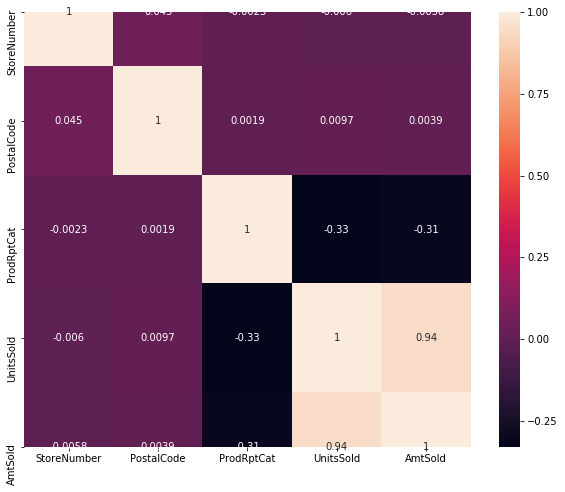

In [320]:
figure=plt.figure(figsize=(10,8))
sns.heatmap(cust3ini.corr(),annot=True)

Text(0, 0.5, 'Unit Price')

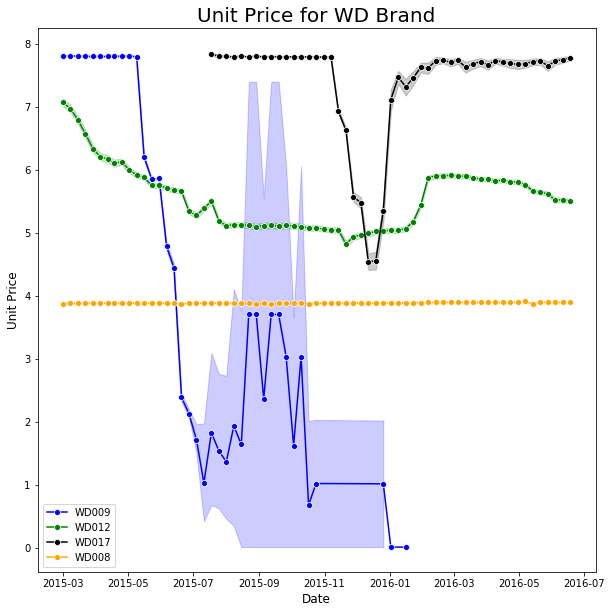

In [321]:
fig,ax=plt.subplots(figsize=(10,10))
x1=cust3_WD009['EndDate']
y1=cust3_WD009['WD009UnitPrice']
x2=cust3_WD012['EndDate']
y2=cust3_WD012['WD012UnitPrice']
x3=cust3_WD017['EndDate']
y3=cust3_WD017['WD017UnitPrice']
x4=cust3_WD008['EndDate']
y4=cust3_WD008['WD008UnitPrice']
plt.title('Unit Price for WD Brand',fontsize=20)
ax=sns.lineplot(x1,y1,ax=ax,color='blue',marker='o',label='WD009')
ax=sns.lineplot(x2,y2,ax=ax,color='green',marker='o',label='WD012')
ax=sns.lineplot(x3,y3,ax=ax,color='black',marker='o',label='WD017')
ax=sns.lineplot(x4,y4,ax=ax,color='orange',marker='o',label='WD008')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)

Text(0, 0.5, 'Units Sold ')

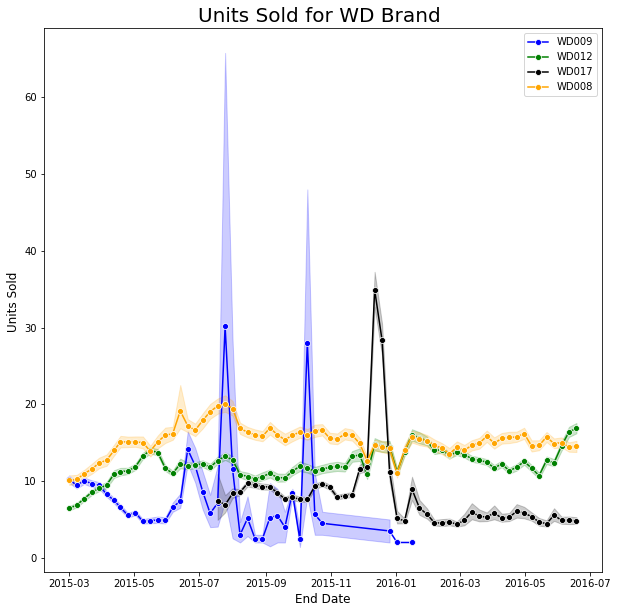

In [322]:
fig,ax=plt.subplots(figsize=(10,10))

x1=cust3_WD009['EndDate']
y1=cust3_WD009['WD009UnitsSold']
x2=cust3_WD012['EndDate']
y2=cust3_WD012['WD012UnitsSold']
x3=cust3_WD017['EndDate']
y3=cust3_WD017['WD017UnitsSold']
x4=cust3_WD008['EndDate']
y4=cust3_WD008['WD008UnitsSold']
plt.title('Units Sold for WD Brand ',fontsize=20)
ax=sns.lineplot(x1,y1,ax=ax,color='blue',marker='o',label='WD009')
ax=sns.lineplot(x2,y2,ax=ax,color='green',marker='o',label='WD012')
ax=sns.lineplot(x3,y3,ax=ax,color='black',marker='o',label='WD017')
ax=sns.lineplot(x4,y4,ax=ax,color='orange',marker='o',label='WD008')
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BCCF59F648>,
      dtype=object)

<Figure size 2160x2160 with 0 Axes>

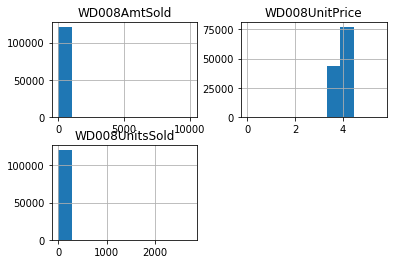

In [323]:
fig=plt.figure(figsize=(30,30))
cust3_WD008.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BCC1DB5EC8>,
      dtype=object)

<Figure size 2160x1440 with 0 Axes>

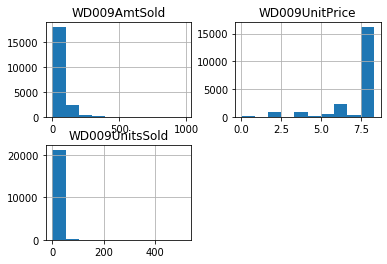

In [324]:
fig=plt.figure(figsize=(30,20))
cust3_WD009.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BCC1DB5C48>,
      dtype=object)

<Figure size 2160x1440 with 0 Axes>

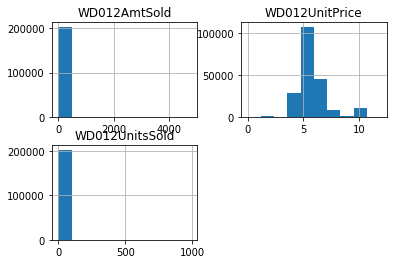

In [325]:
fig=plt.figure(figsize=(30,20))
cust3_WD012.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BCB3C1BB48>,
      dtype=object)

<Figure size 2160x1440 with 0 Axes>

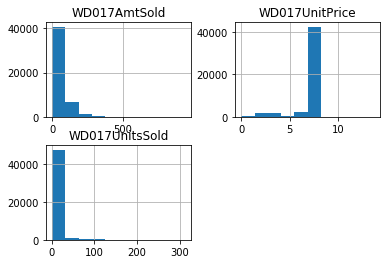

In [326]:
fig=plt.figure(figsize=(30,20))
cust3_WD017.hist()

Text(0.5, 1.0, 'WD008 Unit Price Box Plot')

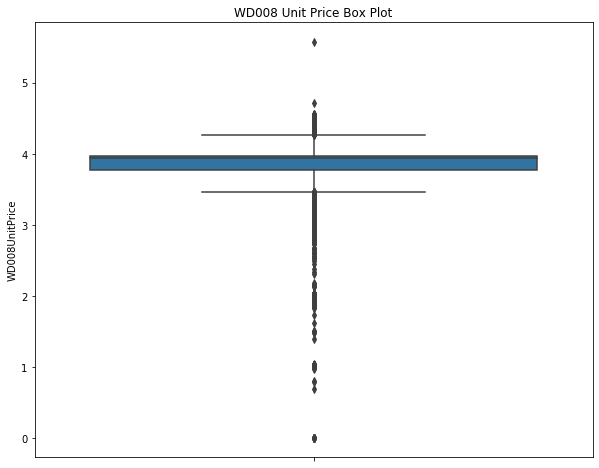

In [327]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD008['WD008UnitPrice'])
plt.title('WD008 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD008 Units Sold Box Plot')

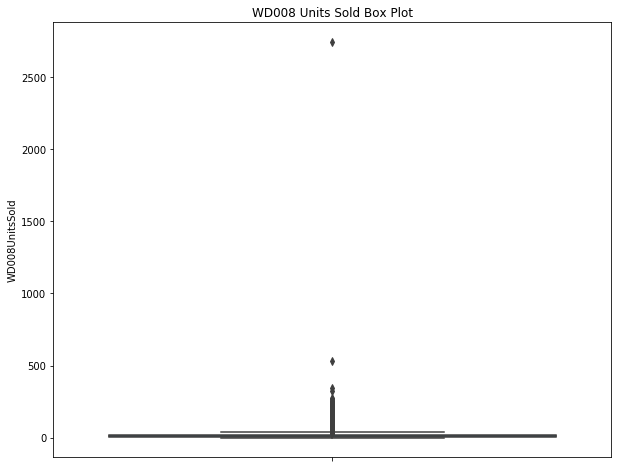

In [328]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD008['WD008UnitsSold'])
plt.title('WD008 Units Sold Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD009 Unit Price Box Plot')

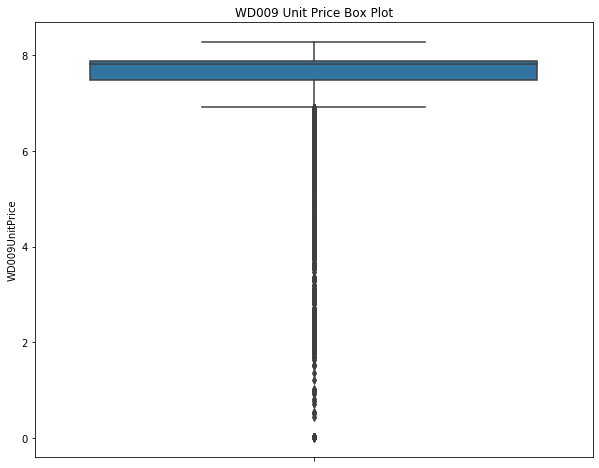

In [329]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD009['WD009UnitPrice'])
plt.title('WD009 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD009 Units Sold Box Plot')

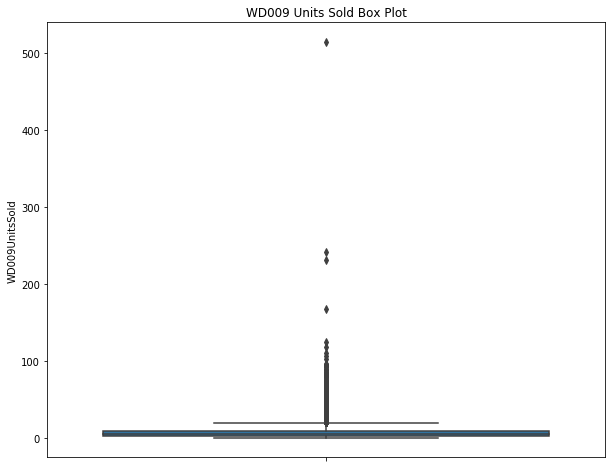

In [330]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD009['WD009UnitsSold'])
plt.title('WD009 Units Sold Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD012 Unit Price Box Plot')

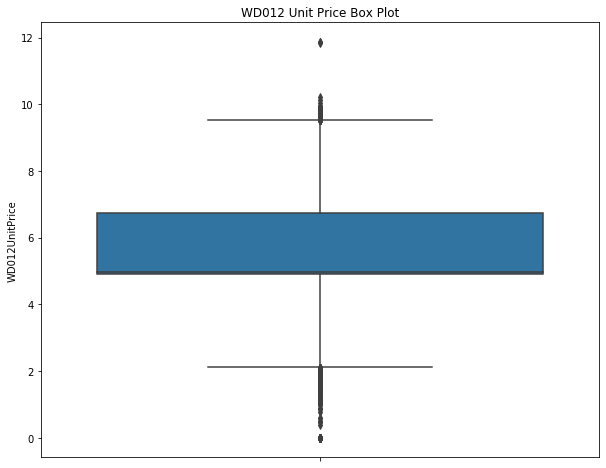

In [331]:
fig=plt.subplots(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD012['WD012UnitPrice'])
plt.title('WD012 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD012 Units Sold Box Plot')

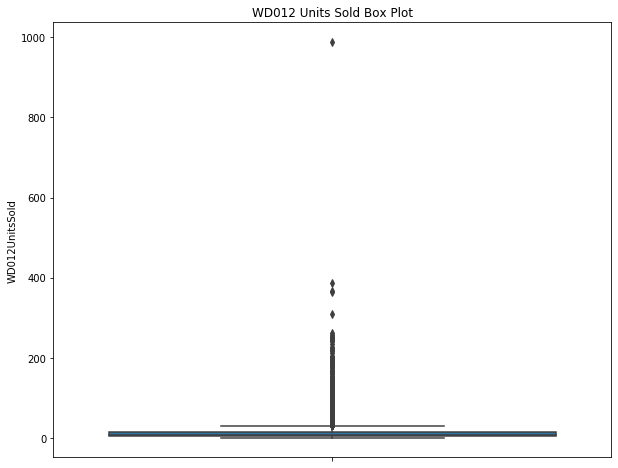

In [332]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD012['WD012UnitsSold'])
plt.title('WD012 Units Sold Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD017 Unit Price Box Plot')

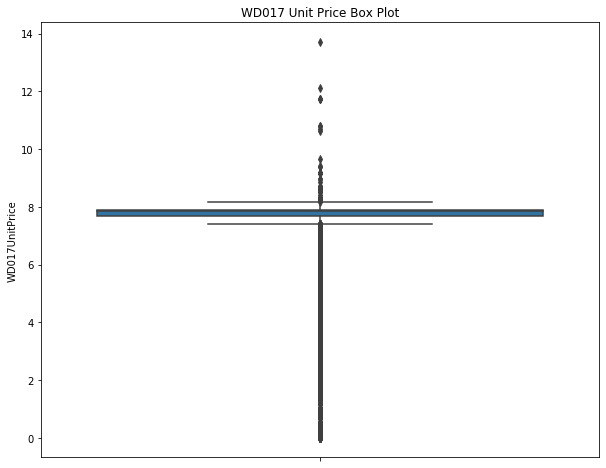

In [333]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD017['WD017UnitPrice'])
plt.title('WD017 Unit Price Box Plot',fontsize=12)

Text(0.5, 1.0, 'WD017 Units Sold Box Plot')

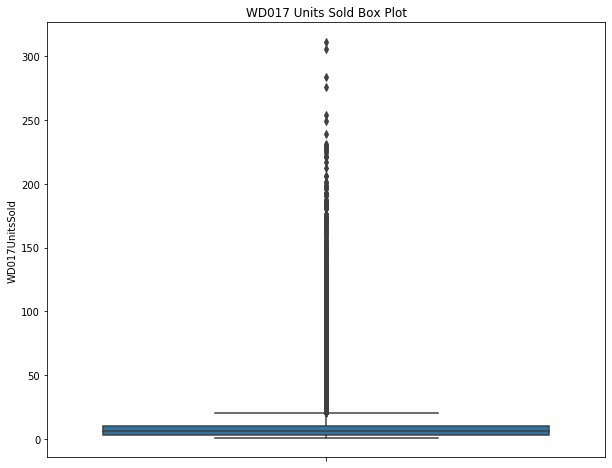

In [334]:
fig=plt.figure(figsize=(10,8))
ax=sns.boxplot(y=cust3_WD017['WD017UnitsSold'])
plt.title('WD017 Units Sold Box Plot',fontsize=12)

Text(0, 0.5, 'UnitsSold')

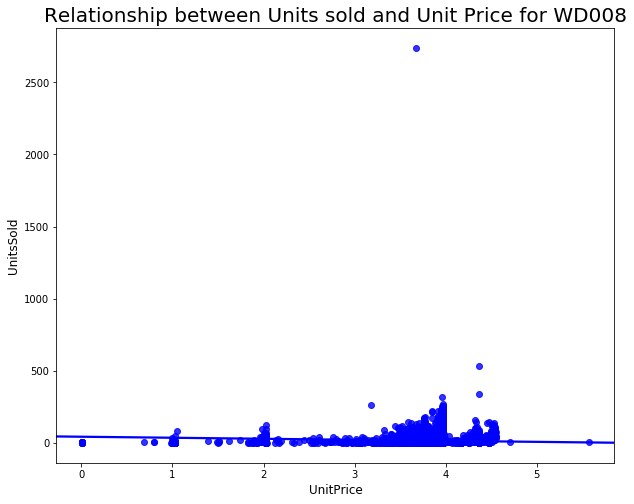

In [335]:
fig=plt.figure(figsize=(10,8))
x=cust3_WD008['WD008UnitPrice']
y=cust3_WD008['WD008UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD008',fontsize=20)
plt.xlabel('UnitPrice',fontsize=12)
plt.ylabel('UnitsSold',fontsize=12)

Text(0, 0.5, 'UnitsSold')

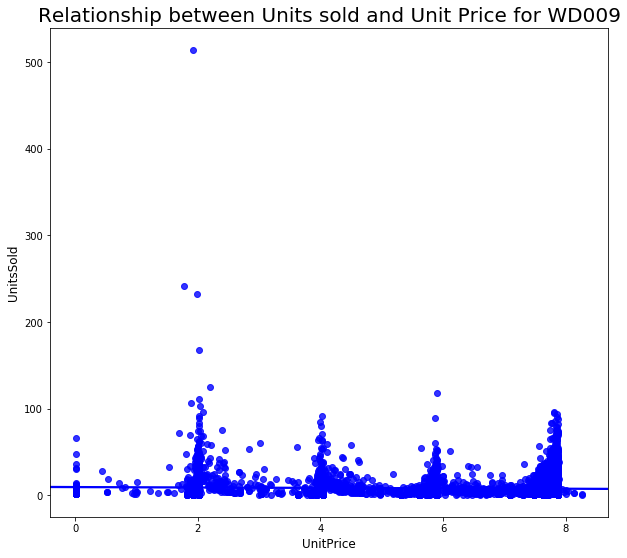

In [336]:
fig=plt.figure(figsize=(10,9))
x=cust3_WD009['WD009UnitPrice']
y=cust3_WD009['WD009UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD009',fontsize=20)
plt.xlabel('UnitPrice',fontsize=12)
plt.ylabel('UnitsSold',fontsize=12)

Text(0, 0.5, 'UnitsSold')

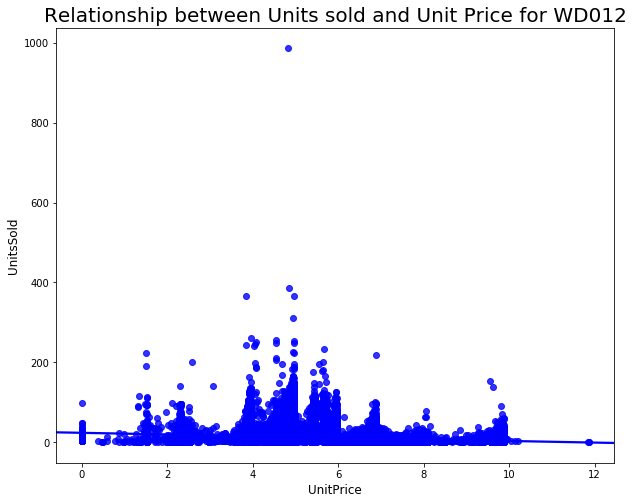

In [337]:
fig=plt.figure(figsize=(10,8))
x=cust3_WD012['WD012UnitPrice']
y=cust3_WD012['WD012UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD012',fontsize=20)
plt.xlabel('UnitPrice',fontsize=12)
plt.ylabel('UnitsSold',fontsize=12)

Text(0, 0.5, 'UnitsSold')

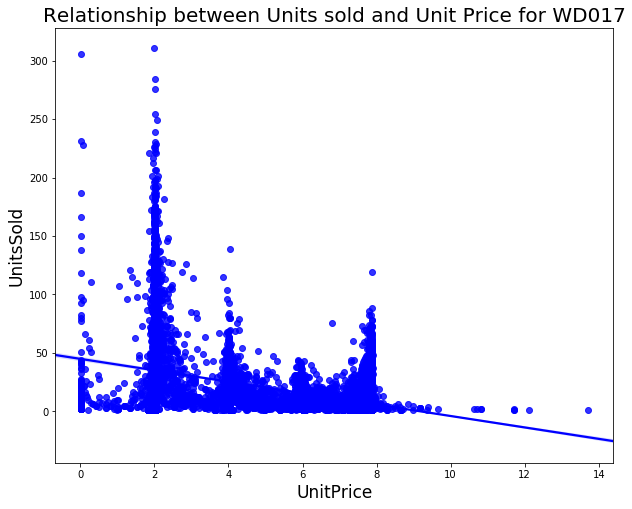

In [338]:
fig=plt.figure(figsize=(10,8))
x=cust3_WD017['WD017UnitPrice']
y=cust3_WD017['WD017UnitsSold']
sns.regplot(x,y, color = 'blue')
plt.title('Relationship between Units sold and Unit Price for WD017',fontsize=20)
plt.xlabel('UnitPrice',fontsize=17)
plt.ylabel('UnitsSold',fontsize=17)

## (iv) Finding and treating the outliers in each of the Products through IQR

#### WD008

In [339]:
customer3_WD_brand_008_Q1=cust3_WD008.WD008UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_WD_brand_008_Q1)

customer3_WD_brand_008_Q3=cust3_WD008.WD008UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_WD_brand_008_Q3)

customer3_WD_brand_008_IQR=customer3_WD_brand_008_Q3-customer3_WD_brand_008_Q1
print("IQR",customer3_WD_brand_008_IQR)

Quantile 1: 3.77
Quantile 3: 3.97
IQR 0.20000000000000018


In [340]:
upperrange=customer3_WD_brand_008_Q3+(customer3_WD_brand_008_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer3_WD_brand_008_Q1-(customer3_WD_brand_008_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 4.2700000000000005
Lower Range: 3.4699999999999998


In [341]:
df_WD008=cust3_WD008[(cust3_WD008.WD008UnitPrice <= 4.2700000000000005) & (cust3_WD008.WD008UnitPrice >= 3.4699999999999998)]

#### WD009 

In [342]:
customer3_WD_brand_009_Q1=cust3_WD009.WD009UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_WD_brand_009_Q1)

customer3_WD_brand_009_Q3=cust3_WD009.WD009UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_WD_brand_009_Q3)

customer3_WD_brand_009_IQR=customer3_WD_brand_009_Q3-customer3_WD_brand_009_Q1
print("IQR",customer3_WD_brand_009_IQR)

Quantile 1: 7.4875
Quantile 3: 7.88
IQR 0.39250000000000007


In [343]:
upperrange=customer3_WD_brand_009_Q3+(customer3_WD_brand_009_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer3_WD_brand_009_Q1-(customer3_WD_brand_009_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 8.46875
Lower Range: 6.89875


In [344]:
df_WD009=cust3_WD009[(cust3_WD009.WD009UnitPrice <= 8.46875) & (cust3_WD009.WD009UnitPrice >= 6.89875)]

#### WD012

In [345]:
customer3_WD_brand_012_Q1=cust3_WD012.WD012UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_WD_brand_012_Q1)

customer3_WD_brand_012_Q3=cust3_WD012.WD012UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_WD_brand_012_Q3)

customer3_WD_brand_012_IQR=customer3_WD_brand_012_Q3-customer3_WD_brand_012_Q1
print("IQR",customer3_WD_brand_012_IQR)

Quantile 1: 4.9
Quantile 3: 6.746700000000001
IQR 1.8467000000000002


In [346]:
upperrange=customer3_WD_brand_012_Q3+(customer3_WD_brand_012_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer3_WD_brand_012_Q1-(customer3_WD_brand_012_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 9.516750000000002
Lower Range: 2.12995


In [347]:
df_WD012=cust3_WD012[(cust3_WD012.WD012UnitPrice <= 9.516750000000002) & (cust3_WD012.WD012UnitPrice >= 2.12995)]

#### WD017

In [348]:
customer3_WD_brand_017_Q1=cust3_WD017.WD017UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_WD_brand_017_Q1)

customer3_WD_brand_017_Q3=cust3_WD017.WD017UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_WD_brand_017_Q3)

customer3_WD_brand_017_IQR=customer3_WD_brand_017_Q3-customer3_WD_brand_017_Q1
print("IQR",customer3_WD_brand_017_IQR)

Quantile 1: 7.685
Quantile 3: 7.88
IQR 0.19500000000000028


In [349]:
upperrange=customer3_WD_brand_017_Q3+(customer3_WD_brand_017_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer3_WD_brand_017_Q1-(customer3_WD_brand_017_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 8.1725
Lower Range: 7.392499999999999


In [350]:
df_WD017=cust3_WD017[(cust3_WD017.WD017UnitPrice <= 8.1725) & (cust3_WD017.WD017UnitPrice >= 7.392499999999999)]

#### SPC10 

In [351]:
customer3_SPC_brand_10_Q1=cust3_SPC10.SPC10UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_SPC_brand_10_Q1)

customer3_SPC_brand_10_Q3=cust3_SPC10.SPC10UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_SPC_brand_10_Q3)

customer3_SPC_brand_10_IQR=customer3_SPC_brand_10_Q3-customer3_SPC_brand_10_Q1
print("IQR",customer3_SPC_brand_10_IQR)

Quantile 1: 5.97
Quantile 3: 6.97
IQR 1.0


In [352]:
upperrange=customer3_SPC_brand_10_Q3+(customer3_SPC_brand_10_IQR*1.5)
print("Upper Range:",upperrange)
lowerrange=customer3_SPC_brand_10_Q1-(customer3_SPC_brand_10_IQR*1.5)
print("Lower Range:",lowerrange)

Upper Range: 8.469999999999999
Lower Range: 4.47


In [353]:
df_SPC10=cust3_SPC10[(cust3_SPC10.SPC10UnitPrice <= 8.469999999999999) & (cust3_SPC10.SPC10UnitPrice >= 4.47)]

#### SPC11 

In [354]:
customer3_SPC_brand_11_Q1=cust3_SPC11.SPC11UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_SPC_brand_11_Q1)

customer3_SPC_brand_11_Q3=cust3_SPC11.SPC11UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_SPC_brand_11_Q3)

customer3_SPC_brand_11_IQR=customer3_SPC_brand_11_Q3-customer3_SPC_brand_11_Q1
print("IQR",customer3_SPC_brand_11_IQR)

# Upper and lower range are same as IQR is 0. Hence not treating outliers

Quantile 1: 5.97
Quantile 3: 5.97
IQR 0.0


In [355]:
df_SPC11=cust3_SPC11.copy()

#### SPC15 

In [356]:
customer3_SPC_brand_15_Q1=cust3_SPC15.SPC15UnitPrice.quantile(0.25)
print("Quantile 1:",customer3_SPC_brand_15_Q1)

customer3_SPC_brand_15_Q3=cust3_SPC15.SPC15UnitPrice.quantile(0.75)
print("Quantile 3:",customer3_SPC_brand_15_Q3)

customer3_SPC_brand_15_IQR=customer3_SPC_brand_15_Q3-customer3_SPC_brand_15_Q1
print("IQR",customer3_SPC_brand_15_IQR)

# Upper and lower range are same as IQR is 0. Hence not treating outliers

Quantile 1: 5.97
Quantile 3: 5.97
IQR 0.0


In [357]:
df_SPC15=cust3_SPC15.copy()

### Aggregating the data Weekly

#### WD008 

In [358]:
df_WD008_agg = df_WD008.groupby("EndDate",as_index=True)[['WD008UnitsSold','WD008UnitPrice']].agg({'WD008UnitsSold':np.sum,'WD008UnitPrice':np.mean})

In [359]:
df_WD008_agg.head()

,WD008UnitsSold,WD008UnitPrice
EndDate,,
2015-03-01,17454.0,3.899458
2015-03-08,17508.0,3.892321
2015-03-15,19029.0,3.891779
2015-03-22,19844.0,3.891661
2015-03-29,21199.0,3.890634


In [360]:
df_WD008_agg.corr()

,WD008UnitsSold,WD008UnitPrice
WD008UnitsSold,1.000000,-0.577124
WD008UnitPrice,-0.577124,1.000000


#### WD009

In [361]:
df_WD009_agg = df_WD009.groupby("EndDate",as_index=True)[['WD009UnitsSold','WD009UnitPrice']].agg({'WD009UnitsSold':np.sum,'WD009UnitPrice':np.mean})

In [362]:
df_WD009_agg.head()

,WD009UnitsSold,WD009UnitPrice
EndDate,,
2015-03-01,17204.0,7.814270
2015-03-08,15773.0,7.810959
2015-03-15,16661.0,7.813555
2015-03-22,15892.0,7.810992
2015-03-29,15088.0,7.812445


In [363]:
df_WD009_agg.corr()

,WD009UnitsSold,WD009UnitPrice
WD009UnitsSold,1.000000,0.476985
WD009UnitPrice,0.476985,1.000000


#### WD012 

In [364]:
df_WD012_agg = df_WD012.groupby("EndDate",as_index=True)[['WD012UnitsSold','WD012UnitPrice']].agg({'WD012UnitsSold':np.sum,'WD012UnitPrice':np.mean})

In [365]:
df_WD012_agg.head()

,WD012UnitsSold,WD012UnitPrice
EndDate,,
2015-03-01,20665.0,6.024677
2015-03-08,22340.0,5.992335
2015-03-15,25590.0,5.973422
2015-03-22,27384.0,5.916473
2015-03-29,27817.3,5.862227


In [366]:
df_WD012_agg.corr()

,WD012UnitsSold,WD012UnitPrice
WD012UnitsSold,1.000000,0.556625
WD012UnitPrice,0.556625,1.000000


#### WD017 

In [367]:
df_WD017_agg = df_WD017.groupby("EndDate",as_index=True)[['WD017UnitsSold','WD017UnitPrice']].agg({'WD017UnitsSold':np.sum,'WD017UnitPrice':np.mean})

In [368]:
df_WD017_agg.head()

,WD017UnitsSold,WD017UnitPrice
EndDate,,
2015-07-18,261.0,7.834457
2015-07-25,1521.0,7.828012
2015-08-01,5627.0,7.816865
2015-08-08,12034.0,7.810003
2015-08-15,15578.0,7.811892


In [369]:
df_WD017_agg.corr()

,WD017UnitsSold,WD017UnitPrice
WD017UnitsSold,1.000000,-0.693391
WD017UnitPrice,-0.693391,1.000000


#### SPC10 

In [370]:
df_SPC10_agg = df_SPC10.groupby("EndDate",as_index=True)[['SPC10UnitsSold','SPC10UnitPrice']].agg({'SPC10UnitsSold':np.sum,'SPC10UnitPrice':np.mean})

In [371]:
df_SPC10_agg.head()

,SPC10UnitsSold,SPC10UnitPrice
EndDate,,
2015-03-01,2192.0,5.988686
2015-03-08,2318.0,6.058047
2015-03-15,2677.0,6.156502
2015-03-22,2819.0,6.167470
2015-03-29,2929.0,6.204815


In [372]:
df_SPC10_agg.corr()

,SPC10UnitsSold,SPC10UnitPrice
SPC10UnitsSold,1.000000,0.759623
SPC10UnitPrice,0.759623,1.000000


#### SPC11 

In [373]:
df_SPC11_agg = df_SPC11.groupby("EndDate",as_index=True)[['SPC11UnitsSold','SPC11UnitPrice']].agg({'SPC11UnitsSold':np.sum,'SPC11UnitPrice':np.mean})

In [374]:
df_SPC11_agg.head()

,SPC11UnitsSold,SPC11UnitPrice
EndDate,,
2015-03-01,5148.0,5.933162
2015-03-08,5110.0,5.935069
2015-03-15,5592.0,5.935533
2015-03-22,5620.0,5.933610
2015-03-29,5639.0,5.934239


In [375]:
df_SPC11_agg.corr()

,SPC11UnitsSold,SPC11UnitPrice
SPC11UnitsSold,1.000000,-0.170793
SPC11UnitPrice,-0.170793,1.000000


#### SPC15

In [376]:
df_SPC15_agg = df_SPC15.groupby("EndDate",as_index=True)[['SPC15UnitsSold','SPC15UnitPrice']].agg({'SPC15UnitsSold':np.sum,'SPC15UnitPrice':np.mean})

In [377]:
df_SPC15_agg.head()

,SPC15UnitsSold,SPC15UnitPrice
EndDate,,
2015-08-22,1.0,5.970000
2016-01-02,1.0,5.970000
2016-01-23,5.0,5.970000
2016-01-30,38.0,5.948750
2016-02-06,41.0,5.894848


In [378]:
df_SPC15_agg.corr()

,SPC15UnitsSold,SPC15UnitPrice
SPC15UnitsSold,1.000000,-0.008996
SPC15UnitPrice,-0.008996,1.000000


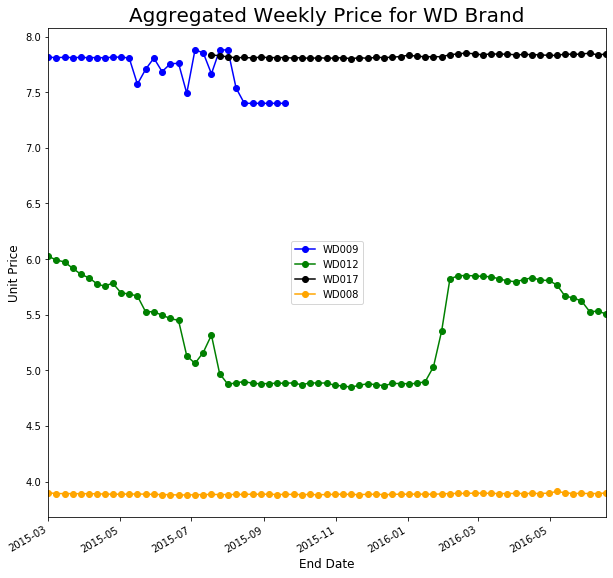

In [379]:
fig,ax=plt.subplots(figsize=(10,10))
df_WD009_agg['WD009UnitPrice'].plot(color='blue',marker='o',label='WD009')
ax.legend()
df_WD012_agg['WD012UnitPrice'].plot(color='green',marker='o',label='WD012')
ax.legend()
df_WD017_agg['WD017UnitPrice'].plot(color='black',marker='o',label='WD017')
ax.legend()
df_WD008_agg['WD008UnitPrice'].plot(color='orange',marker='o',label='WD008')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)
plt.title("Aggregated Weekly Price for WD Brand",fontsize=20)
plt.show()

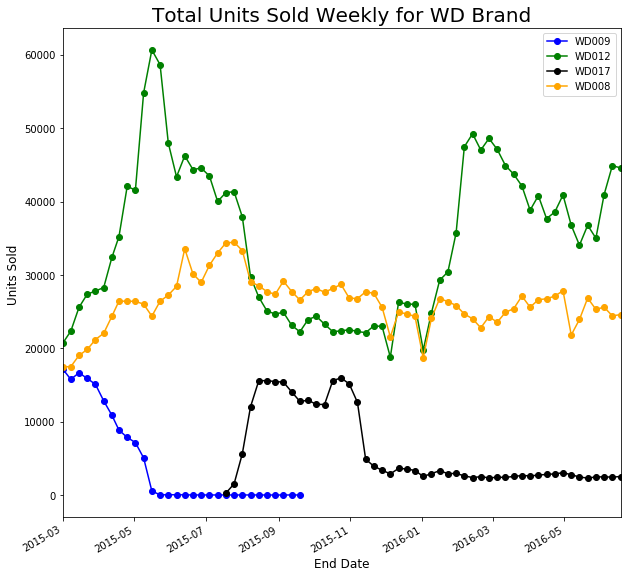

In [380]:
fig,ax=plt.subplots(figsize=(10,10))
df_WD009_agg['WD009UnitsSold'].plot(color='blue',marker='o',label='WD009')
ax.legend()
df_WD012_agg['WD012UnitsSold'].plot(color='green',marker='o',label='WD012')
ax.legend()
df_WD017_agg['WD017UnitsSold'].plot(color='black',marker='o',label='WD017')
ax.legend()
df_WD008_agg['WD008UnitsSold'].plot(color='orange',marker='o',label='WD008')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Units Sold ',fontsize=12)
plt.title("Total Units Sold Weekly for WD Brand",fontsize=20)
plt.show()

## (v) Point Elasticity Plot

In [381]:
#Calculation of the Percentage Change for Unit Price and Units Sold

#### WD008 

In [382]:
df_WD008_agg.shape

(69, 2)

In [383]:
lst = [0]
for i in range(1,69):
    numerator = (df_WD008_agg.WD008UnitsSold[i]-df_WD008_agg.WD008UnitsSold[i-1])/df_WD008_agg.WD008UnitsSold[i-1]
    denominator = (df_WD008_agg.WD008UnitPrice[i]-df_WD008_agg.WD008UnitPrice[i-1])/df_WD008_agg.WD008UnitPrice[i-1]
    
    lst.append(numerator/denominator)

In [384]:
PED_WD008 = df_WD008_agg.iloc[:,[0,1]].copy()

In [385]:
PED_WD008['WD008_PED'] = lst

In [386]:
PED_WD008.head()

,WD008UnitsSold,WD008UnitPrice,WD008_PED
EndDate,,,
2015-03-01,17454.0,3.899458,0.000000
2015-03-08,17508.0,3.892321,-1.690457
2015-03-15,19029.0,3.891779,-624.008482
2015-03-22,19844.0,3.891661,-1407.526735
2015-03-29,21199.0,3.890634,-258.849118


In [387]:
PED_WD008_A=PED_WD008.drop(PED_WD008.index[[40]])

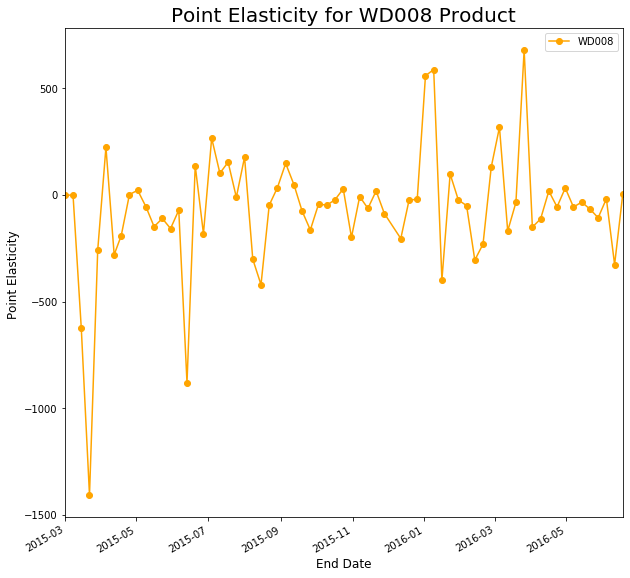

In [388]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD008_A['WD008_PED'].plot(color='orange',marker='o',label='WD008')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD008 Product",fontsize=20)
plt.show()

#### WD009 

In [389]:
df_WD009_agg.shape

(30, 2)

In [390]:
lst = [0]
for i in range(1,30):
    numerator = (df_WD009_agg.WD009UnitsSold[i]-df_WD009_agg.WD009UnitsSold[i-1])/df_WD009_agg.WD009UnitsSold[i-1]
    denominator = (df_WD009_agg.WD009UnitPrice[i]-df_WD009_agg.WD009UnitPrice[i-1])/df_WD009_agg.WD009UnitPrice[i-1]
    
    lst.append(numerator/denominator)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [391]:
PED_WD009 = df_WD009_agg.iloc[:,[0,1]].copy()

In [392]:
PED_WD009['WD009_PED'] = lst

In [393]:
PED_WD009.head()

,WD009UnitsSold,WD009UnitPrice,WD009_PED
EndDate,,,
2015-03-01,17204.0,7.814270,0.000000
2015-03-08,15773.0,7.810959,196.296528
2015-03-15,16661.0,7.813555,169.388865
2015-03-22,15892.0,7.810992,140.701839
2015-03-29,15088.0,7.812445,-271.874140


In [394]:
PED_WD009_A=PED_WD009.drop(PED_WD009.index[[29,28,27,26,25,22]])

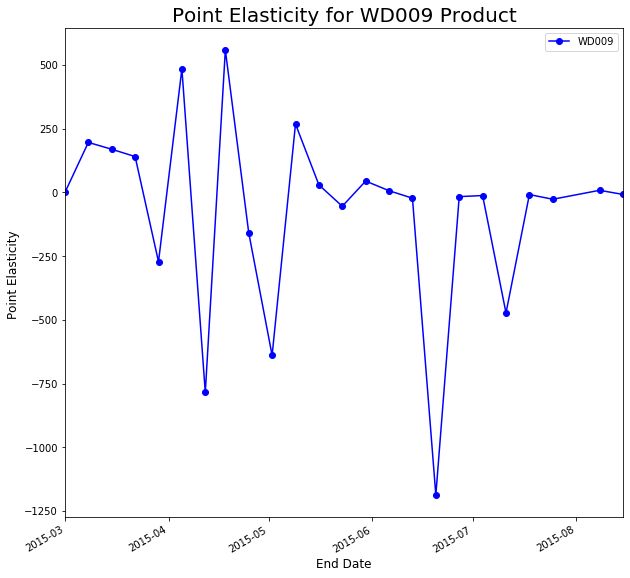

In [395]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD009_A['WD009_PED'].plot(color='blue',marker='o',label='WD009')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD009 Product",fontsize=20)
plt.show()

#### WD012 

In [396]:
df_WD012_agg.shape

(69, 2)

In [397]:
lst = [0]
for i in range(1,69):
    numerator = (df_WD012_agg.WD012UnitsSold[i]-df_WD012_agg.WD012UnitsSold[i-1])/df_WD012_agg.WD012UnitsSold[i-1]
    denominator = (df_WD012_agg.WD012UnitPrice[i]-df_WD012_agg.WD012UnitPrice[i-1])/df_WD012_agg.WD012UnitPrice[i-1]
    
    lst.append(numerator/denominator)

In [398]:
PED_WD012 = df_WD012_agg.iloc[:,[0,1]].copy()

In [399]:
PED_WD012['WD012_PED'] = lst

In [400]:
PED_WD012.head()

,WD012UnitsSold,WD012UnitPrice,WD012_PED
EndDate,,,
2015-03-01,20665.0,6.024677,0.000000
2015-03-08,22340.0,5.992335,-15.099020
2015-03-15,25590.0,5.973422,-46.094524
2015-03-22,27384.0,5.916473,-7.353421
2015-03-29,27817.3,5.862227,-1.725771


In [401]:
PED_WD012_A=PED_WD012.drop(PED_WD012.index[[29]])

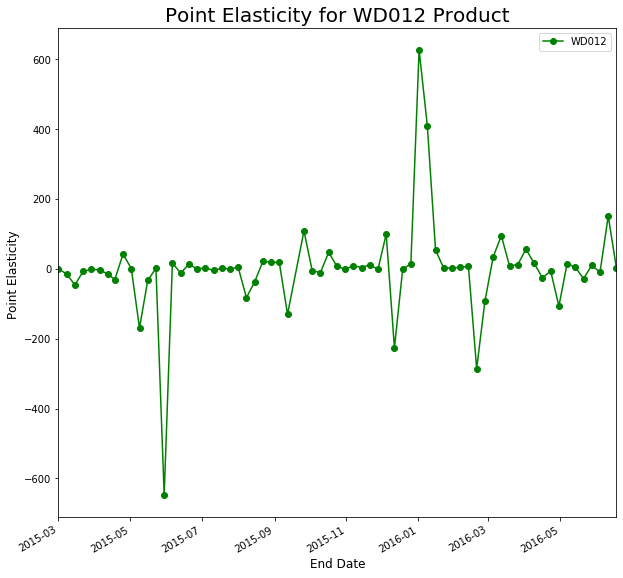

In [402]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD012_A['WD012_PED'].plot(color='green',marker='o',label='WD012')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD012 Product",fontsize=20)
plt.show()

#### WD017 

In [403]:
df_WD017_agg.shape

(49, 2)

In [404]:
lst = [0]
for i in range(1,49):
    numerator = (df_WD017_agg.WD017UnitsSold[i]-df_WD017_agg.WD017UnitsSold[i-1])/df_WD017_agg.WD017UnitsSold[i-1]
    denominator = (df_WD017_agg.WD017UnitPrice[i]-df_WD017_agg.WD017UnitPrice[i-1])/df_WD017_agg.WD017UnitPrice[i-1]
    
    lst.append(numerator/denominator)

In [405]:
PED_WD017 = df_WD017_agg.iloc[:,[0,1]].copy()

In [406]:
PED_WD017['WD017_PED'] = lst

In [407]:
PED_WD017.head()

,WD017UnitsSold,WD017UnitPrice,WD017_PED
EndDate,,,
2015-07-18,261.0,7.834457,0.000000
2015-07-25,1521.0,7.828012,-5868.519512
2015-08-01,5627.0,7.816865,-1895.620436
2015-08-08,12034.0,7.810003,-1297.207026
2015-08-15,15578.0,7.811892,1217.719811


In [408]:
PED_WD017_A=PED_WD017.drop(PED_WD017.index[[9,1]])

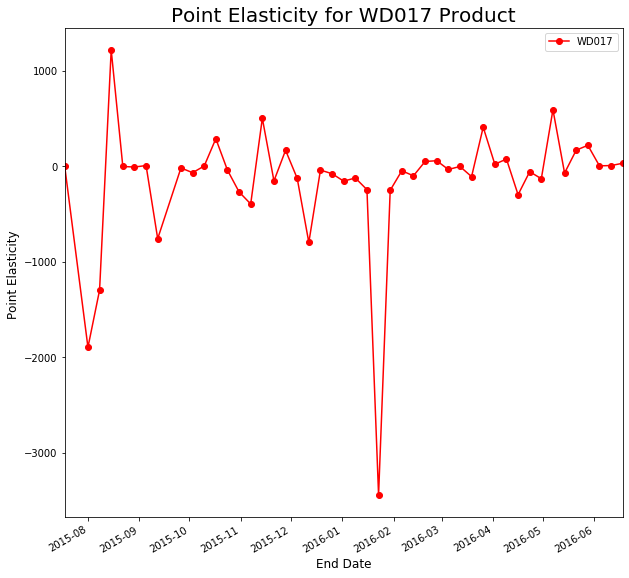

In [409]:
fig,ax=plt.subplots(figsize=(10,10))
PED_WD017_A['WD017_PED'].plot(color='red',marker='o',label='WD017')
ax.legend()
plt.xlabel('End Date',fontsize=12)
plt.ylabel('Point Elasticity ',fontsize=12)
plt.title("Point Elasticity for WD017 Product",fontsize=20)
plt.show()

In [410]:
PED_WD008['WD008_PED'].median()

-47.9329788069048

### Point Elasticity Median value for WD008 is -47.93

In [411]:
PED_WD009['WD009_PED'].median()

-7.853600083359371

### Point Elasticity Median value for WD009 is -7.85

In [412]:
PED_WD012['WD012_PED'].median()

1.4255408299568946

### Point Elasticity Median value for WD012 is 1.43

In [413]:
PED_WD017['WD017_PED'].median()

-40.55477009583672

### Point Elasticity Median value for WD017 is -40.55

# Cross Elasticity

### WD8_SPC10_11_15 

#### Impact of competitior pricing on WD008

In [414]:
WD8_SPC10=pd.merge(df_WD008_agg, df_SPC10_agg, on='EndDate',how='outer')

WD8_SPC10_11=pd.merge(WD8_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD8_SPC10_11_15=pd.merge(WD8_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [415]:
WD8_SPC10_11_15.describe()

,WD008UnitsSold,WD008UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,26146.144928,3.888536,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,3526.232898,0.005569,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,17454.000000,3.879307,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,24385.000000,3.884427,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,26419.000000,3.886912,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,27723.000000,3.892464,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,34456.000000,3.910884,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [416]:
WD8_SPC10_11_15.isnull().sum()

WD008UnitsSold     0
WD008UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [417]:
WD8_SPC10_11_15['SPC15UnitPrice'].fillna(value=WD8_SPC10_11_15['SPC15UnitPrice'].median(), inplace=True)

In [418]:
WD8_SPC10_11_15.describe()

,WD008UnitsSold,WD008UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,24.000000,69.000000
mean,26146.144928,3.888536,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928949
std,3526.232898,0.005569,288.210259,0.070123,1051.252283,0.026363,139.388201,0.016310
min,17454.000000,3.879307,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,24385.000000,3.884427,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.929211
50%,26419.000000,3.886912,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,27723.000000,3.892464,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.929211
max,34456.000000,3.910884,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [419]:
X_WD008=WD8_SPC10_11_15.drop(['WD008UnitsSold','WD008UnitPrice','SPC10UnitsSold','SPC11UnitsSold','SPC15UnitsSold'],axis=1)
y_WD008=WD8_SPC10_11_15['WD008UnitsSold']

In [420]:
y_WD008=pd.DataFrame(y_WD008)

In [421]:
X_WD008.head()

,SPC10UnitPrice,SPC11UnitPrice,SPC15UnitPrice
EndDate,,,
2015-03-01,5.988686,5.933162,5.929211
2015-03-08,6.058047,5.935069,5.929211
2015-03-15,6.156502,5.935533,5.929211
2015-03-22,6.167470,5.933610,5.929211
2015-03-29,6.204815,5.934239,5.929211


In [422]:
WD008_CE = ols('np.log(y_WD008)~ np.log(X_WD008)', data=WD8_SPC10_11_15).fit()
print(WD008_CE.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD008)   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     12.56
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.42e-06
Time:                        14:22:47   Log-Likelihood:                 54.184
No. Observations:                  69   AIC:                            -100.4
Df Residuals:                      65   BIC:                            -91.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0447     10

### WD9_SPC10_11_15

#### Impact of competitior pricing on WD009

In [423]:
WD9_SPC10=pd.merge(df_WD009_agg, df_SPC10_agg, on='EndDate',how='outer')

WD9_SPC10_11=pd.merge(WD9_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD9_SPC10_11_15=pd.merge(WD9_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [424]:
WD9_SPC10_11_15.describe()

,WD009UnitsSold,WD009UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,30.000000,30.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,4467.366667,7.693426,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,6443.838444,0.176547,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,3.000000,7.400000,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,7.250000,7.545933,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,25.500000,7.806831,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,8605.750000,7.813277,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,17204.000000,7.880000,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [425]:
WD9_SPC10_11_15.isnull().sum()

WD009UnitsSold    39
WD009UnitPrice    39
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [426]:
WD9_SPC10_11_15.loc[pd.isna(WD9_SPC10_11_15['WD009UnitPrice']), :].index  

#Identifying NA in target variable to drop it and avoid manipulation

DatetimeIndex(['2015-09-26', '2015-10-03', '2015-10-10', '2015-10-17',
               '2015-10-24', '2015-10-31', '2015-11-07', '2015-11-14',
               '2015-11-21', '2015-11-28', '2015-12-05', '2015-12-12',
               '2015-12-19', '2015-12-26', '2016-01-02', '2016-01-09',
               '2016-01-16', '2016-01-23', '2016-01-30', '2016-02-06',
               '2016-02-13', '2016-02-20', '2016-02-27', '2016-03-05',
               '2016-03-12', '2016-03-19', '2016-03-26', '2016-04-02',
               '2016-04-09', '2016-04-16', '2016-04-23', '2016-04-30',
               '2016-05-07', '2016-05-14', '2016-05-21', '2016-05-28',
               '2016-06-04', '2016-06-11', '2016-06-18'],
              dtype='datetime64[ns]', name='EndDate', freq=None)

In [427]:
WD9_SPC10_11_15_A=WD9_SPC10_11_15.drop(WD9_SPC10_11_15.index[[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
            64, 65, 66, 67, 68]])

In [428]:
WD9_SPC10_11_15_A.describe()

,WD009UnitsSold,WD009UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,1.0,1.00
mean,4467.366667,7.693426,3110.300000,6.300935,5560.133333,5.944139,1.0,5.97
std,6443.838444,0.176547,298.494862,0.094213,218.244522,0.009667,NaN,NaN
min,3.000000,7.400000,2192.000000,5.988686,5110.000000,5.926483,1.0,5.97
25%,7.250000,7.545933,3041.750000,6.305628,5434.500000,5.934082,1.0,5.97
50%,25.500000,7.806831,3174.500000,6.334814,5593.500000,5.948016,1.0,5.97
75%,8605.750000,7.813277,3274.250000,6.353370,5653.250000,5.952283,1.0,5.97
max,17204.000000,7.880000,3681.000000,6.370362,6031.000000,5.956221,1.0,5.97


In [429]:
X_WD009 =WD9_SPC10_11_15_A.drop(['WD009UnitsSold','WD009UnitPrice','SPC10UnitsSold','SPC11UnitsSold','SPC15UnitsSold','SPC15UnitPrice'],axis=1)
y_WD009 =WD9_SPC10_11_15_A['WD009UnitsSold']

#Dropping SPC15 as there is just one record left post removing NA in target variable

In [430]:
y_WD009=pd.DataFrame(y_WD009)

In [431]:
X_WD009.head()

,SPC10UnitPrice,SPC11UnitPrice
EndDate,,
2015-03-01,5.988686,5.933162
2015-03-08,6.058047,5.935069
2015-03-15,6.156502,5.935533
2015-03-22,6.167470,5.933610
2015-03-29,6.204815,5.934239


In [432]:
WD009_CE = ols('(y_WD009)~ (X_WD009)', data=WD9_SPC10_11_15_A).fit()
print(WD009_CE.summary())

                            OLS Regression Results                            
Dep. Variable:                y_WD009   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.02e-16
Time:                        14:22:47   Log-Likelihood:                -265.80
No. Observations:                  30   AIC:                             537.6
Df Residuals:                      27   BIC:                             541.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.285e+06    2.3e+05      9.927      0.0

### WD12_SPC10_11_15 

#### Impact of competitior pricing on WD012

In [433]:
WD12_SPC10=pd.merge(df_WD012_agg, df_SPC10_agg, on='EndDate',how='outer')

WD12_SPC10_11=pd.merge(WD12_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD12_SPC10_11_15=pd.merge(WD12_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [434]:
WD12_SPC10_11_15.isnull().sum()

WD012UnitsSold     0
WD012UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [435]:
WD12_SPC10_11_15.describe()

,WD012UnitsSold,WD012UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,34659.627826,5.368719,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,10499.500296,0.428454,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,18789.000000,4.848601,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,24835.000000,4.884063,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,35234.000000,5.495310,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,43382.000000,5.804199,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,60681.000000,6.024677,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [436]:
WD12_SPC10_11_15['SPC15UnitPrice'].fillna(value=WD12_SPC10_11_15['SPC15UnitPrice'].median(), inplace=True)

In [437]:
WD12_SPC10_11_15.describe()

,WD012UnitsSold,WD012UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,24.000000,69.000000
mean,34659.627826,5.368719,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928949
std,10499.500296,0.428454,288.210259,0.070123,1051.252283,0.026363,139.388201,0.016310
min,18789.000000,4.848601,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,24835.000000,4.884063,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.929211
50%,35234.000000,5.495310,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,43382.000000,5.804199,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.929211
max,60681.000000,6.024677,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [438]:
X_WD012=WD12_SPC10_11_15.drop(['WD012UnitsSold','WD012UnitPrice','SPC10UnitsSold','SPC11UnitsSold','SPC15UnitsSold'],axis=1)
y_WD012=WD12_SPC10_11_15['WD012UnitsSold']

In [439]:
y_WD012=pd.DataFrame(y_WD012)

In [440]:
X_WD012.head()

,SPC10UnitPrice,SPC11UnitPrice,SPC15UnitPrice
EndDate,,,
2015-03-01,5.988686,5.933162,5.929211
2015-03-08,6.058047,5.935069,5.929211
2015-03-15,6.156502,5.935533,5.929211
2015-03-22,6.167470,5.933610,5.929211
2015-03-29,6.204815,5.934239,5.929211


In [441]:
WD012_CE = ols('np.log(y_WD012)~ np.log(X_WD012)', data=WD12_SPC10_11_15).fit()
print(WD012_CE.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD012)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     9.022
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.45e-05
Time:                        14:22:48   Log-Likelihood:                -4.1506
No. Observations:                  69   AIC:                             16.30
Df Residuals:                      65   BIC:                             25.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1880     25

### WD17_SPC10_11_15 

#### Impact of competitior pricing on WD017

In [442]:
WD17_SPC10=pd.merge(df_WD017_agg, df_SPC10_agg, on='EndDate',how='outer')

WD17_SPC10_11=pd.merge(WD17_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD17_SPC10_11_15=pd.merge(WD17_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [443]:
WD17_SPC10_11_15.describe()

,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,49.000000,49.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,6058.571429,7.824556,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,5272.603539,0.015097,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,261.000000,7.800650,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,2524.000000,7.810811,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,2922.000000,7.820550,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,12342.000000,7.838285,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,15969.000000,7.852586,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [444]:
WD17_SPC10_11_15.isnull().sum()

WD017UnitsSold    20
WD017UnitPrice    20
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [445]:
WD17_SPC10_11_15.loc[pd.isna(WD17_SPC10_11_15['WD017UnitsSold']), :].index    #Identifying NA in target variable to drop it

DatetimeIndex(['2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
               '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-18',
               '2015-04-25', '2015-05-02', '2015-05-09', '2015-05-16',
               '2015-05-23', '2015-05-30', '2015-06-06', '2015-06-13',
               '2015-06-20', '2015-06-27', '2015-07-04', '2015-07-11'],
              dtype='datetime64[ns]', name='EndDate', freq=None)

In [446]:
WD17_SPC10_11_15_A=WD17_SPC10_11_15.drop(WD17_SPC10_11_15.index[[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
            66, 67, 68]])

In [447]:
WD17_SPC10_11_15_A.describe()

,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,24.000000,24.000000
mean,6058.571429,7.824556,3310.204082,6.362175,6349.367347,5.959854,221.125000,5.928458
std,5272.603539,0.015097,224.432430,0.015637,1162.196604,0.028953,139.388201,0.028038
min,261.000000,7.800650,2366.000000,6.329383,4984.000000,5.898196,1.000000,5.833512
25%,2524.000000,7.810811,3210.000000,6.351048,5547.000000,5.944568,116.000000,5.920908
50%,2922.000000,7.820550,3303.000000,6.359838,5984.000000,5.951000,241.000000,5.929211
75%,12342.000000,7.838285,3455.000000,6.373591,6473.000000,5.990237,325.250000,5.939704
max,15969.000000,7.852586,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [448]:
WD17_SPC10_11_15_A['SPC15UnitPrice'].fillna(value=WD17_SPC10_11_15_A['SPC15UnitPrice'].median(), inplace=True)

In [449]:
WD17_SPC10_11_15_A.describe()

,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,24.000000,49.000000
mean,6058.571429,7.824556,3310.204082,6.362175,6349.367347,5.959854,221.125000,5.928842
std,5272.603539,0.015097,224.432430,0.015637,1162.196604,0.028953,139.388201,0.019412
min,261.000000,7.800650,2366.000000,6.329383,4984.000000,5.898196,1.000000,5.833512
25%,2524.000000,7.810811,3210.000000,6.351048,5547.000000,5.944568,116.000000,5.929211
50%,2922.000000,7.820550,3303.000000,6.359838,5984.000000,5.951000,241.000000,5.929211
75%,12342.000000,7.838285,3455.000000,6.373591,6473.000000,5.990237,325.250000,5.929211
max,15969.000000,7.852586,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [450]:
X_WD017=WD17_SPC10_11_15_A.drop(['WD017UnitsSold','WD017UnitPrice','SPC10UnitsSold','SPC11UnitsSold','SPC15UnitsSold'],axis=1)
y_WD017=WD17_SPC10_11_15_A['WD017UnitsSold']

In [451]:
y_WD017=pd.DataFrame(y_WD017)

In [452]:
X_WD017.head()

,SPC10UnitPrice,SPC11UnitPrice,SPC15UnitPrice
EndDate,,,
2015-07-18,6.346482,5.950126,5.929211
2015-07-25,6.353689,5.950219,5.929211
2015-08-01,6.339498,5.949743,5.929211
2015-08-08,6.361827,5.954507,5.929211
2015-08-15,6.359848,5.948483,5.929211


In [453]:
WD017_CE = ols('np.log(y_WD017)~ np.log(X_WD017)', data=WD17_SPC10_11_15_A).fit()
print(WD017_CE.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(y_WD017)   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.452
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.240
Time:                        14:22:48   Log-Likelihood:                -59.319
No. Observations:                  49   AIC:                             126.6
Df Residuals:                      45   BIC:                             134.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            109.6283    126

# OLS Model

### Model for WD008

In [454]:
WD008_model = ols('np.log(WD008UnitsSold)~ np.log(WD008UnitPrice)', data=df_WD008_agg).fit()
print(WD008_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD008UnitsSold)   R-squared:                       0.319
Model:                                OLS   Adj. R-squared:                  0.309
Method:                     Least Squares   F-statistic:                     31.36
Date:                    Sun, 17 May 2020   Prob (F-statistic):           4.33e-07
Time:                            14:22:48   Log-Likelihood:                 51.654
No. Observations:                      69   AIC:                            -99.31
Df Residuals:                          67   BIC:                            -94.84
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

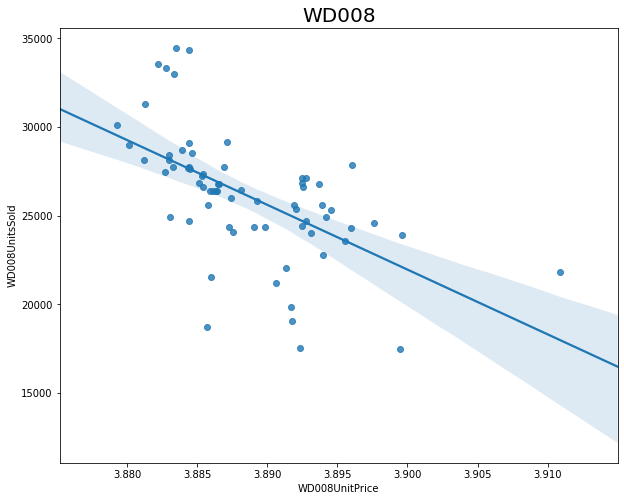

In [455]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD008',fontsize=20)
sns.regplot(x='WD008UnitPrice',y='WD008UnitsSold',data=df_WD008_agg, ax=ax)

### Model for WD009

In [456]:
WD009_model = ols('np.log(WD009UnitsSold)~ np.log(WD009UnitPrice)', data=df_WD009_agg).fit()
print(WD009_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD009UnitsSold)   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.261
Method:                     Least Squares   F-statistic:                     11.25
Date:                    Sun, 17 May 2020   Prob (F-statistic):            0.00229
Time:                            14:22:49   Log-Likelihood:                -74.885
No. Observations:                      30   AIC:                             153.8
Df Residuals:                          28   BIC:                             156.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

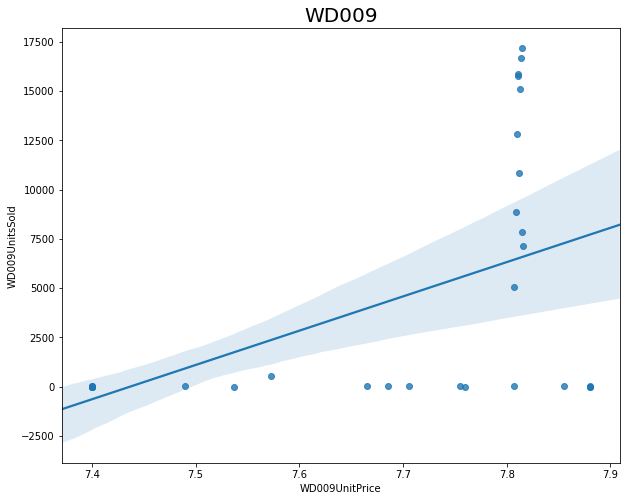

In [457]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD009',fontsize=20)
sns.regplot(x='WD009UnitPrice',y='WD009UnitsSold',data=df_WD009_agg, ax=ax)

### Model for WD012

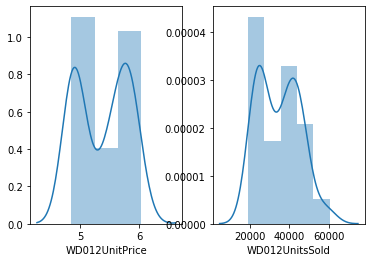

In [458]:
fig, ax=plt.subplots(1,2)
sns.distplot(df_WD012_agg.WD012UnitPrice, ax=ax[0])
sns.distplot(df_WD012_agg.WD012UnitsSold, ax=ax[1])

In [459]:
WD012_model = ols('np.log(WD012UnitsSold)~ np.log(WD012UnitPrice)', data=df_WD012_agg).fit()
print(WD012_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD012UnitsSold)   R-squared:                       0.344
Model:                                OLS   Adj. R-squared:                  0.334
Method:                     Least Squares   F-statistic:                     35.14
Date:                    Sun, 17 May 2020   Prob (F-statistic):           1.18e-07
Time:                            14:22:50   Log-Likelihood:                -1.6128
No. Observations:                      69   AIC:                             7.226
Df Residuals:                          67   BIC:                             11.69
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

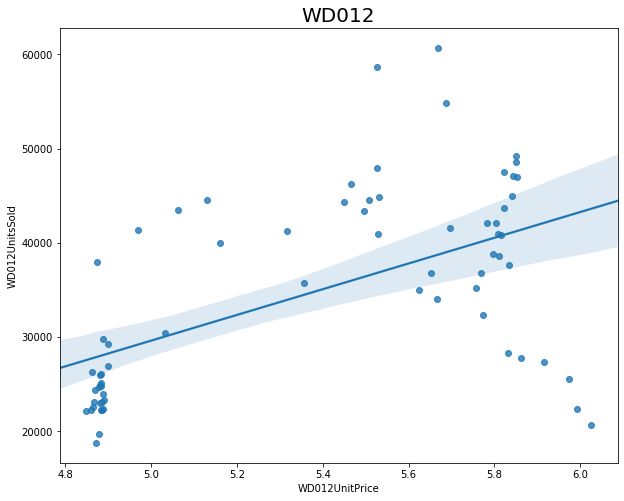

In [460]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD012',fontsize=20)
sns.regplot(x='WD012UnitPrice',y='WD012UnitsSold',data=df_WD012_agg, ax=ax)

### Model for WD017 

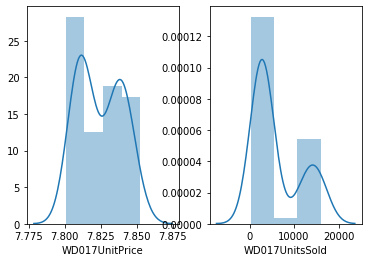

In [461]:
fig, ax=plt.subplots(1,2)
sns.distplot(df_WD017_agg.WD017UnitPrice, ax=ax[0])
sns.distplot(df_WD017_agg.WD017UnitsSold, ax=ax[1])

In [462]:
WD017_model = ols('np.log(WD017UnitsSold)~ np.log(WD017UnitPrice)', data=df_WD017_agg).fit()
print(WD017_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(WD017UnitsSold)   R-squared:                       0.495
Model:                                OLS   Adj. R-squared:                  0.484
Method:                     Least Squares   F-statistic:                     46.08
Date:                    Sun, 17 May 2020   Prob (F-statistic):           1.71e-08
Time:                            14:22:50   Log-Likelihood:                -44.841
No. Observations:                      49   AIC:                             93.68
Df Residuals:                          47   BIC:                             97.46
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

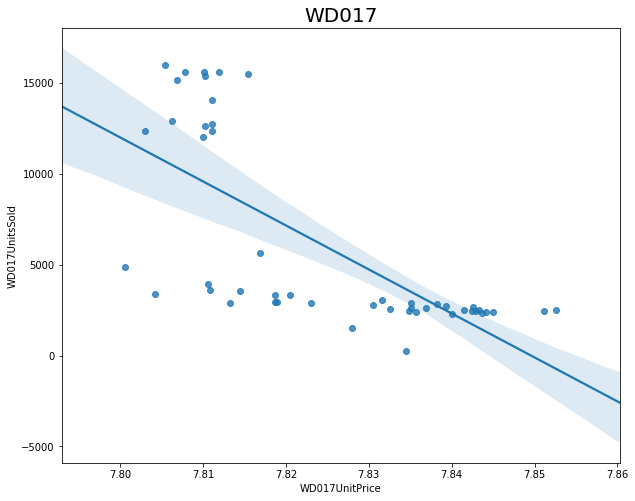

In [463]:
fig,ax=plt.subplots(figsize=(10,8))
plt.title('WD017',fontsize=20)
sns.regplot(x='WD017UnitPrice',y='WD017UnitsSold',data=df_WD017_agg, ax=ax)

## Adding prices of other products as features to build a predictive model for WD brand of products

### WD008 

In [464]:
WD8_WD9=pd.merge(df_WD008_agg, df_WD009_agg, on='EndDate',how='outer')

WD8_WD9_12=pd.merge(WD8_WD9, df_WD012_agg, on='EndDate',how='outer')

WD8_WD9_12_17=pd.merge(WD8_WD9_12, df_WD017_agg, on='EndDate',how='outer')

WD8_WD9_12_17_SPC10=pd.merge(WD8_WD9_12_17, df_SPC10_agg, on='EndDate',how='outer')

WD8_WD9_12_17_SPC10_11=pd.merge(WD8_WD9_12_17_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD8_WD9_12_17_SPC10_11_15=pd.merge(WD8_WD9_12_17_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [465]:
WD8_WD9_12_17_SPC10_11_15.describe()

,WD008UnitsSold,WD008UnitPrice,WD009UnitsSold,WD009UnitPrice,WD012UnitsSold,WD012UnitPrice,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,69.000000,69.000000,30.000000,30.000000,69.000000,69.000000,49.000000,49.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,26146.144928,3.888536,4467.366667,7.693426,34659.627826,5.368719,6058.571429,7.824556,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,3526.232898,0.005569,6443.838444,0.176547,10499.500296,0.428454,5272.603539,0.015097,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,17454.000000,3.879307,3.000000,7.400000,18789.000000,4.848601,261.000000,7.800650,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,24385.000000,3.884427,7.250000,7.545933,24835.000000,4.884063,2524.000000,7.810811,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,26419.000000,3.886912,25.500000,7.806831,35234.000000,5.495310,2922.000000,7.820550,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,27723.000000,3.892464,8605.750000,7.813277,43382.000000,5.804199,12342.000000,7.838285,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,34456.000000,3.910884,17204.000000,7.880000,60681.000000,6.024677,15969.000000,7.852586,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [466]:
WD8_WD9_12_17_SPC10_11_15.isnull().sum()

WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice    39
WD012UnitsSold     0
WD012UnitPrice     0
WD017UnitsSold    20
WD017UnitPrice    20
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [467]:
WD8_WD9_12_17_SPC10_11_15['WD009UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_15['WD009UnitPrice'].median(), inplace=True)

In [468]:
WD8_WD9_12_17_SPC10_11_15['WD017UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_15['WD017UnitPrice'].median(), inplace=True)

In [469]:
WD8_WD9_12_17_SPC10_11_15['SPC15UnitPrice'].fillna(value=WD8_WD9_12_17_SPC10_11_15['SPC15UnitPrice'].median(), inplace=True)

In [470]:
WD8_WD9_12_17_SPC10_11_15.isnull().sum()

WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice     0
WD012UnitsSold     0
WD012UnitPrice     0
WD017UnitsSold    20
WD017UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice     0
dtype: int64

In [471]:
X_WD8_opt=WD8_WD9_12_17_SPC10_11_15.drop(['WD008UnitsSold','WD009UnitsSold','WD009UnitPrice','WD012UnitsSold','WD012UnitPrice','WD017UnitsSold','WD017UnitPrice','SPC10UnitsSold','SPC11UnitsSold','SPC15UnitsSold','SPC15UnitPrice'],axis=1)
y_WD8=WD8_WD9_12_17_SPC10_11_15['WD008UnitsSold']

#Optimized using Backward Step Regression

In [472]:
y_WD8=pd.DataFrame(y_WD8)

In [473]:
X_WD8_opt.head()

,WD008UnitPrice,SPC10UnitPrice,SPC11UnitPrice
EndDate,,,
2015-03-01,3.899458,5.988686,5.933162
2015-03-08,3.892321,6.058047,5.935069
2015-03-15,3.891779,6.156502,5.935533
2015-03-22,3.891661,6.167470,5.933610
2015-03-29,3.890634,6.204815,5.934239


In [474]:
WD008_model_opt = ols('np.log(y_WD8)~ np.log(X_WD8_opt)', data=WD8_WD9_12_17_SPC10_11_15).fit()
print(WD008_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(y_WD8)   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     49.14
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.05e-16
Time:                        14:22:51   Log-Likelihood:                 79.261
No. Observations:                  69   AIC:                            -150.5
Df Residuals:                      65   BIC:                            -141.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.8936 

### WD009 

In [475]:
WD9_WD8=pd.merge(df_WD009_agg, df_WD008_agg, on='EndDate',how='outer')

WD9_WD8_12=pd.merge(WD9_WD8, df_WD012_agg, on='EndDate',how='outer')

WD9_WD8_12_17=pd.merge(WD9_WD8_12, df_WD017_agg, on='EndDate',how='outer')

WD9_WD8_12_17_SPC10=pd.merge(WD9_WD8_12_17, df_SPC10_agg, on='EndDate',how='outer')

WD9_WD8_12_17_SPC10_11=pd.merge(WD9_WD8_12_17_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD9_WD8_12_17_SPC10_11_15=pd.merge(WD9_WD8_12_17_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [476]:
WD9_WD8_12_17_SPC10_11_15.describe()

,WD009UnitsSold,WD009UnitPrice,WD008UnitsSold,WD008UnitPrice,WD012UnitsSold,WD012UnitPrice,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,30.000000,30.000000,69.000000,69.000000,69.000000,69.000000,49.000000,49.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,4467.366667,7.693426,26146.144928,3.888536,34659.627826,5.368719,6058.571429,7.824556,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,6443.838444,0.176547,3526.232898,0.005569,10499.500296,0.428454,5272.603539,0.015097,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,3.000000,7.400000,17454.000000,3.879307,18789.000000,4.848601,261.000000,7.800650,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,7.250000,7.545933,24385.000000,3.884427,24835.000000,4.884063,2524.000000,7.810811,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,25.500000,7.806831,26419.000000,3.886912,35234.000000,5.495310,2922.000000,7.820550,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,8605.750000,7.813277,27723.000000,3.892464,43382.000000,5.804199,12342.000000,7.838285,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,17204.000000,7.880000,34456.000000,3.910884,60681.000000,6.024677,15969.000000,7.852586,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [477]:
WD9_WD8_12_17_SPC10_11_15.isnull().sum()

WD009UnitsSold    39
WD009UnitPrice    39
WD008UnitsSold     0
WD008UnitPrice     0
WD012UnitsSold     0
WD012UnitPrice     0
WD017UnitsSold    20
WD017UnitPrice    20
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [478]:
WD9_WD8_12_17_SPC10_11_15.loc[pd.isna(WD9_WD8_12_17_SPC10_11_15['WD009UnitsSold']), :].index    #Identifying NA in target variable to drop it

DatetimeIndex(['2015-09-26', '2015-10-03', '2015-10-10', '2015-10-17',
               '2015-10-24', '2015-10-31', '2015-11-07', '2015-11-14',
               '2015-11-21', '2015-11-28', '2015-12-05', '2015-12-12',
               '2015-12-19', '2015-12-26', '2016-01-02', '2016-01-09',
               '2016-01-16', '2016-01-23', '2016-01-30', '2016-02-06',
               '2016-02-13', '2016-02-20', '2016-02-27', '2016-03-05',
               '2016-03-12', '2016-03-19', '2016-03-26', '2016-04-02',
               '2016-04-09', '2016-04-16', '2016-04-23', '2016-04-30',
               '2016-05-07', '2016-05-14', '2016-05-21', '2016-05-28',
               '2016-06-04', '2016-06-11', '2016-06-18'],
              dtype='datetime64[ns]', name='EndDate', freq=None)

In [479]:
WD9_WD8_12_17_SPC10_11_15_A=WD9_WD8_12_17_SPC10_11_15.drop(WD9_WD8_12_17_SPC10_11_15.index[[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
            64, 65, 66, 67, 68]])

In [480]:
WD9_WD8_12_17_SPC10_11_15_A.describe()

,WD009UnitsSold,WD009UnitPrice,WD008UnitsSold,WD008UnitPrice,WD012UnitsSold,WD012UnitPrice,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,10.000000,10.000000,30.000000,30.000000,30.000000,30.000000,1.0,1.00
mean,4467.366667,7.693426,26954.200000,3.886442,36164.676667,5.404667,10830.900000,7.815692,3110.300000,6.300935,5560.133333,5.944139,1.0,5.97
std,6443.838444,0.176547,4722.311389,0.004267,11314.692283,0.415415,6043.138192,0.008734,298.494862,0.094213,218.244522,0.009667,NaN,NaN
min,3.000000,7.400000,17454.000000,3.879307,20665.000000,4.874615,261.000000,7.807786,2192.000000,5.988686,5110.000000,5.926483,1.0,5.97
25%,7.250000,7.545933,24793.750000,3.883388,25939.250000,4.917098,7228.750000,7.810441,3041.750000,6.305628,5434.500000,5.934082,1.0,5.97
50%,25.500000,7.806831,27308.000000,3.885785,36582.500000,5.480596,13416.500000,7.811506,3174.500000,6.334814,5593.500000,5.948016,1.0,5.97
75%,8605.750000,7.813277,29141.000000,3.888846,43469.000000,5.769572,15447.250000,7.816513,3274.250000,6.353370,5653.250000,5.952283,1.0,5.97
max,17204.000000,7.880000,34456.000000,3.899458,60681.000000,6.024677,15598.000000,7.834457,3681.000000,6.370362,6031.000000,5.956221,1.0,5.97


In [481]:
WD9_WD8_12_17_SPC10_11_15_A.isnull().sum()

WD009UnitsSold     0
WD009UnitPrice     0
WD008UnitsSold     0
WD008UnitPrice     0
WD012UnitsSold     0
WD012UnitPrice     0
WD017UnitsSold    20
WD017UnitPrice    20
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    29
SPC15UnitPrice    29
dtype: int64

In [482]:
WD9_WD8_12_17_SPC10_11_15_A['WD017UnitPrice'].fillna(value=WD9_WD8_12_17_SPC10_11_15_A['WD017UnitPrice'].median(), inplace=True)

In [483]:
X_WD9_opt=WD9_WD8_12_17_SPC10_11_15_A.drop(['WD008UnitsSold','WD009UnitsSold','WD009UnitPrice','WD012UnitsSold','WD017UnitsSold','WD017UnitPrice','SPC10UnitsSold','SPC10UnitPrice','SPC11UnitsSold','SPC15UnitsSold','SPC15UnitPrice'],axis=1)
y_WD9=WD9_WD8_12_17_SPC10_11_15_A['WD009UnitsSold']

#Optimized using Backward Step Regression

In [484]:
y_WD9=pd.DataFrame(y_WD9)

In [485]:
X_WD9_opt.head()

,WD008UnitPrice,WD012UnitPrice,SPC11UnitPrice
EndDate,,,
2015-03-01,3.899458,6.024677,5.933162
2015-03-08,3.892321,5.992335,5.935069
2015-03-15,3.891779,5.973422,5.935533
2015-03-22,3.891661,5.916473,5.933610
2015-03-29,3.890634,5.862227,5.934239


In [486]:
WD009_model_opt = ols('(y_WD9)~ (X_WD9_opt)', data=WD9_WD8_12_17_SPC10_11_15_A).fit()
print(WD009_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_WD9   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     52.49
Date:                Sun, 17 May 2020   Prob (F-statistic):           3.62e-11
Time:                        14:22:52   Log-Likelihood:                -275.88
No. Observations:                  30   AIC:                             559.8
Df Residuals:                      26   BIC:                             565.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.371e+06   9.42e+05     -1.455   

### WD012 

In [487]:
WD12_WD8=pd.merge(df_WD012_agg, df_WD008_agg, on='EndDate',how='outer')

W12_WD8_9=pd.merge(WD12_WD8, df_WD009_agg, on='EndDate',how='outer')

WD12_WD8_9_17=pd.merge(W12_WD8_9, df_WD017_agg, on='EndDate',how='outer')

WD12_WD8_9_17_SPC10=pd.merge(WD12_WD8_9_17, df_SPC10_agg, on='EndDate',how='outer')

WD12_WD8_9_17_SPC10_11=pd.merge(WD12_WD8_9_17_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD12_WD8_9_17_SPC10_11_15=pd.merge(WD12_WD8_9_17_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [488]:
WD12_WD8_9_17_SPC10_11_15.describe()

,WD012UnitsSold,WD012UnitPrice,WD008UnitsSold,WD008UnitPrice,WD009UnitsSold,WD009UnitPrice,WD017UnitsSold,WD017UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,69.000000,69.000000,69.000000,69.000000,30.000000,30.000000,49.000000,49.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,34659.627826,5.368719,26146.144928,3.888536,4467.366667,7.693426,6058.571429,7.824556,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,10499.500296,0.428454,3526.232898,0.005569,6443.838444,0.176547,5272.603539,0.015097,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,18789.000000,4.848601,17454.000000,3.879307,3.000000,7.400000,261.000000,7.800650,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,24835.000000,4.884063,24385.000000,3.884427,7.250000,7.545933,2524.000000,7.810811,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,35234.000000,5.495310,26419.000000,3.886912,25.500000,7.806831,2922.000000,7.820550,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,43382.000000,5.804199,27723.000000,3.892464,8605.750000,7.813277,12342.000000,7.838285,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,60681.000000,6.024677,34456.000000,3.910884,17204.000000,7.880000,15969.000000,7.852586,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [489]:
WD12_WD8_9_17_SPC10_11_15.isnull().sum()

WD012UnitsSold     0
WD012UnitPrice     0
WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice    39
WD017UnitsSold    20
WD017UnitPrice    20
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [490]:
WD12_WD8_9_17_SPC10_11_15['WD009UnitPrice'].fillna(value=WD12_WD8_9_17_SPC10_11_15['WD009UnitPrice'].median(), inplace=True)

In [491]:
WD12_WD8_9_17_SPC10_11_15['WD017UnitPrice'].fillna(value=WD12_WD8_9_17_SPC10_11_15['WD017UnitPrice'].median(), inplace=True)

In [492]:
WD12_WD8_9_17_SPC10_11_15['SPC15UnitPrice'].fillna(value=WD12_WD8_9_17_SPC10_11_15['SPC15UnitPrice'].median(), inplace=True)

In [493]:
WD12_WD8_9_17_SPC10_11_15.isnull().sum()

WD012UnitsSold     0
WD012UnitPrice     0
WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice     0
WD017UnitsSold    20
WD017UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice     0
dtype: int64

In [494]:
X_WD12_opt=WD12_WD8_9_17_SPC10_11_15.drop(['WD008UnitsSold','WD009UnitsSold','WD009UnitPrice','WD012UnitsSold','WD017UnitsSold','WD017UnitPrice','SPC10UnitsSold','SPC11UnitsSold','SPC11UnitPrice','SPC15UnitsSold','SPC15UnitPrice'],axis=1)
y_WD12=WD12_WD8_9_17_SPC10_11_15['WD012UnitsSold']

#Optimized using Backward Step Regression

In [495]:
y_WD12=pd.DataFrame(y_WD12)

In [496]:
X_WD12_opt.head()

,WD012UnitPrice,WD008UnitPrice,SPC10UnitPrice
EndDate,,,
2015-03-01,6.024677,3.899458,5.988686
2015-03-08,5.992335,3.892321,6.058047
2015-03-15,5.973422,3.891779,6.156502
2015-03-22,5.916473,3.891661,6.167470
2015-03-29,5.862227,3.890634,6.204815


In [497]:
WD012_model_opt = ols('np.log(y_WD12)~ np.log(X_WD12_opt)', data=WD12_WD8_9_17_SPC10_11_15).fit()
print(WD012_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(y_WD12)   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     54.01
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.23e-17
Time:                        14:22:52   Log-Likelihood:                 26.988
No. Observations:                  69   AIC:                            -45.98
Df Residuals:                      65   BIC:                            -37.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               102.28

### WD017 

In [498]:
WD17_WD8=pd.merge(df_WD017_agg, df_WD008_agg, on='EndDate',how='outer')

W17_WD8_9=pd.merge(WD17_WD8, df_WD009_agg, on='EndDate',how='outer')

WD17_WD8_9_12=pd.merge(W17_WD8_9, df_WD012_agg, on='EndDate',how='outer')

WD17_WD8_9_12_SPC10=pd.merge(WD17_WD8_9_12, df_SPC10_agg, on='EndDate',how='outer')

WD17_WD8_9_12_SPC10_11=pd.merge(WD17_WD8_9_12_SPC10, df_SPC11_agg, on='EndDate',how='outer')

WD17_WD8_9_12_SPC10_11_15=pd.merge(WD17_WD8_9_12_SPC10_11, df_SPC15_agg, on='EndDate',how='outer')

In [499]:
WD17_WD8_9_12_SPC10_11_15.describe()

,WD017UnitsSold,WD017UnitPrice,WD008UnitsSold,WD008UnitPrice,WD009UnitsSold,WD009UnitPrice,WD012UnitsSold,WD012UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,49.000000,49.000000,69.000000,69.000000,30.000000,30.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,24.000000,24.000000
mean,6058.571429,7.824556,26146.144928,3.888536,4467.366667,7.693426,34659.627826,5.368719,3231.391304,6.336296,6114.405797,5.954422,221.125000,5.928458
std,5272.603539,0.015097,3526.232898,0.005569,6443.838444,0.176547,10499.500296,0.428454,288.210259,0.070123,1051.252283,0.026363,139.388201,0.028038
min,261.000000,7.800650,17454.000000,3.879307,3.000000,7.400000,18789.000000,4.848601,2192.000000,5.988686,4984.000000,5.898196,1.000000,5.833512
25%,2524.000000,7.810811,24385.000000,3.884427,7.250000,7.545933,24835.000000,4.884063,3134.000000,6.339196,5477.000000,5.934239,116.000000,5.920908
50%,2922.000000,7.820550,26419.000000,3.886912,25.500000,7.806831,35234.000000,5.495310,3254.000000,6.352642,5691.000000,5.950219,241.000000,5.929211
75%,12342.000000,7.838285,27723.000000,3.892464,8605.750000,7.813277,43382.000000,5.804199,3408.000000,6.368695,6187.000000,5.969037,325.250000,5.939704
max,15969.000000,7.852586,34456.000000,3.910884,17204.000000,7.880000,60681.000000,6.024677,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [500]:
WD17_WD8_9_12_SPC10_11_15.isnull().sum()

WD017UnitsSold    20
WD017UnitPrice    20
WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice    39
WD012UnitsSold     0
WD012UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    45
SPC15UnitPrice    45
dtype: int64

In [501]:
WD17_WD8_9_12_SPC10_11_15.loc[pd.isna(WD17_WD8_9_12_SPC10_11_15['WD017UnitsSold']), :].index    #Identifying NA in target variable to drop it

DatetimeIndex(['2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
               '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-18',
               '2015-04-25', '2015-05-02', '2015-05-09', '2015-05-16',
               '2015-05-23', '2015-05-30', '2015-06-06', '2015-06-13',
               '2015-06-20', '2015-06-27', '2015-07-04', '2015-07-11'],
              dtype='datetime64[ns]', name='EndDate', freq=None)

In [502]:
WD17_WD8_9_12_SPC10_11_15_A=WD17_WD8_9_12_SPC10_11_15.drop(WD17_WD8_9_12_SPC10_11_15.index[[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
            66, 67, 68]])

In [503]:
WD17_WD8_9_12_SPC10_11_15_A.isnull().sum()

WD017UnitsSold     0
WD017UnitPrice     0
WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice    39
WD012UnitsSold     0
WD012UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    25
SPC15UnitPrice    25
dtype: int64

In [504]:
WD17_WD8_9_12_SPC10_11_15_A.describe()

,WD017UnitsSold,WD017UnitPrice,WD008UnitsSold,WD008UnitPrice,WD009UnitsSold,WD009UnitPrice,WD012UnitsSold,WD012UnitPrice,SPC10UnitsSold,SPC10UnitPrice,SPC11UnitsSold,SPC11UnitPrice,SPC15UnitsSold,SPC15UnitPrice
count,49.000000,49.000000,49.000000,49.000000,10.000000,10.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,24.000000,24.000000
mean,6058.571429,7.824556,26404.224490,3.889056,6.700000,7.536265,32732.633061,5.258396,3310.204082,6.362175,6349.367347,5.959854,221.125000,5.928458
std,5272.603539,0.015097,2866.677659,0.005764,3.301515,0.201227,9451.664925,0.430213,224.432430,0.015637,1162.196604,0.028953,139.388201,0.028038
min,261.000000,7.800650,18695.000000,3.881230,3.000000,7.400000,18789.000000,4.848601,2366.000000,6.329383,4984.000000,5.898196,1.000000,5.833512
25%,2524.000000,7.810811,24682.000000,3.884453,3.500000,7.400000,23925.000000,4.881407,3210.000000,6.351048,5547.000000,5.944568,116.000000,5.920908
50%,2922.000000,7.820550,26622.000000,3.886912,6.500000,7.400000,30415.000000,4.899401,3303.000000,6.359838,5984.000000,5.951000,241.000000,5.929211
75%,12342.000000,7.838285,27720.000000,3.892754,8.750000,7.633437,40968.000000,5.796115,3455.000000,6.373591,6473.000000,5.990237,325.250000,5.939704
max,15969.000000,7.852586,34456.000000,3.910884,12.000000,7.880000,49252.000000,5.851530,3715.000000,6.397809,9981.000000,6.012147,434.000000,5.970000


In [505]:
WD17_WD8_9_12_SPC10_11_15_A['WD009UnitPrice'].fillna(value=WD17_WD8_9_12_SPC10_11_15_A['WD009UnitPrice'].median(), inplace=True)

In [506]:
WD17_WD8_9_12_SPC10_11_15_A['SPC15UnitPrice'].fillna(value=WD17_WD8_9_12_SPC10_11_15_A['SPC15UnitPrice'].median(), inplace=True)

In [507]:
WD17_WD8_9_12_SPC10_11_15_A.isnull().sum()

WD017UnitsSold     0
WD017UnitPrice     0
WD008UnitsSold     0
WD008UnitPrice     0
WD009UnitsSold    39
WD009UnitPrice     0
WD012UnitsSold     0
WD012UnitPrice     0
SPC10UnitsSold     0
SPC10UnitPrice     0
SPC11UnitsSold     0
SPC11UnitPrice     0
SPC15UnitsSold    25
SPC15UnitPrice     0
dtype: int64

In [508]:
X_WD17_opt=WD17_WD8_9_12_SPC10_11_15_A.drop(['WD008UnitsSold','WD008UnitPrice','WD009UnitsSold','WD012UnitsSold','WD017UnitsSold','SPC10UnitsSold','SPC10UnitPrice','SPC11UnitsSold','SPC15UnitsSold'],axis=1)
y_WD17=WD17_WD8_9_12_SPC10_11_15_A['WD017UnitsSold']

#Optimized using Backward Step Regression

In [509]:
y_WD17=pd.DataFrame(y_WD17)

In [510]:
X_WD17_opt.head()

,WD017UnitPrice,WD009UnitPrice,WD012UnitPrice,SPC11UnitPrice,SPC15UnitPrice
EndDate,,,,,
2015-07-18,7.834457,7.66555,5.316751,5.950126,5.929211
2015-07-25,7.828012,7.88000,4.970191,5.950219,5.929211
2015-08-01,7.816865,7.88000,4.874615,5.949743,5.929211
2015-08-08,7.810003,7.53710,4.887346,5.954507,5.929211
2015-08-15,7.811892,7.40000,4.899401,5.948483,5.929211


In [511]:
WD017_model_opt = ols('np.log(y_WD17)~ np.log(X_WD17_opt)', data=WD17_WD8_9_12_SPC10_11_15_A).fit()
print(WD017_model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(y_WD17)   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     19.30
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.95e-10
Time:                        14:22:53   Log-Likelihood:                -32.745
No. Observations:                  49   AIC:                             77.49
Df Residuals:                      43   BIC:                             88.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               490.25

## Total revenue for Customer 3

In [512]:
totalRevenue        #(Post data cleaning and before outlier treatment)

28337857.678814005

## Calculate the weighted Average

In [513]:
cust3_WD008.head()

,EndDate,WD008UnitsSold,WD008AmtSold,WD008UnitPrice
5,2015-03-01,1.0,3.5700,3.5700
7,2015-03-01,11.0,41.4799,3.7709
9,2015-03-01,58.0,222.2618,3.8321
17,2015-03-01,7.0,27.6703,3.9529
18,2015-03-01,2.0,7.3400,3.6700


In [514]:
cust3_WD008_wt=cust3_WD008['WD008AmtSold'].sum()/totalRevenue
print('Weight of WD008: ',cust3_WD008_wt)

Weight of WD008:  0.2524964399708094


In [515]:
cust3_WD009_wt=cust3_WD009['WD009AmtSold'].sum()/totalRevenue
print('Weight of WD009: ',cust3_WD009_wt)

Weight of WD009:  0.04187068758507712


In [516]:
cust3_WD012_wt=cust3_WD012['WD012AmtSold'].sum()/totalRevenue
print('Weight of WD012: ',cust3_WD012_wt)

Weight of WD012:  0.46030699148672993


In [517]:
cust3_WD017_wt=cust3_WD017['WD017AmtSold'].sum()/totalRevenue
print('Weight of WD017: ',cust3_WD017_wt)

Weight of WD017:  0.09917659123544666


In [518]:
round(-313.3396,3)

-313.34

In [519]:
wt_WD_cust3 =[0.252,0.042,0.46,0.099]

In [520]:
elasticity_coeff_WD_cust3=[-55.121,81.771,2.253,-313.34]

In [521]:
weighted_elasticity=[]

In [522]:
for num1,num2 in zip(wt_WD_cust3,elasticity_coeff_WD_cust3):
    weighted_elasticity.append(num1*num2)

In [523]:
print(weighted_elasticity)

[-13.890492, 3.4343820000000003, 1.03638, -31.02066]


In [524]:
total_elasticity=np.sum(weighted_elasticity)
print('Total Elasticity of WD Product for Customer 3: ',total_elasticity)

Total Elasticity of WD Product for Customer 3:  -40.44039
